# Proyecto individual Nº2 PI_DA: Telecomunicaciones

#### Objetivo de negocio:
* Empresa prestadora de servicios de telecomunicaciones solicita realizar una análisis completo que permita reconocer el comportamiento de este sector a nivel nacional:
  * Analizar la principal actividad que es brindar acceso a internet.
  * Considerar el resto de servicios de comunicación para que el cliente brinde una buena calidad de sus servicios.
  * Identificar oportunidades de crecimiento.
  * Plantear soluciones personalizadas a sus posibles clientes.

#### Fases de trabajo:
1. Análisis exploratorio de datos para determinar las transformaciones de variables apropiadas, identificar patrones, y conclusiones.
2. Construir KPIs que se integren con el dashboard:
   1.  *Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.*
3. Construir un dashboard interactivo, funcional utilizando filtros adecuados.
4. Generar un readme.md que describa el desarrollo del proyecto y sus correspondientes conclusiones.
5. Narrar un storytelling en 10'.

### Datset a utilizar:
1. El archivo 'internet.xlsx' contiene los detalles de las localidades en Argentina con acceso a internet.
2. El archivo 'Diccionario_de_datos_PIDA.md contiene la descripción de cada variable.

> ## 1. Análisis exploratorio de los datos

#### Procesos a realizar:
1. Búsqueda de valores faltantes
2. Valores atípicos u outliers
3. Registros duplicados
4. Gráficos analíticos
5. Análisis de convencia en las formas normales de las tablas.
6. Conclusiones

#### Consideraciones antes de comenzar el EDA:
1. En los siguientes análisis se utilizará la métrica: 'accesos a internet cada 100 hogares' y se descartará la métrica: 'accesos a internet cada 100 habitantes'. Lo lógica de esta hipótesis es que los hogares tienden a ser conformados por 4 personas (familia tipo), la tecnología va a mejorar, y con un acceso en cada hogar será suficiente. Por lo cual, dado el ritmo de crecimiento de los últimos 5 años, 

2. De la anterior premisa, se deduce que Capital Federal ha logrado el objetivo de un acceso por hogar, lo cual, los esfuerzos deberían centrarse en las provincias que están más lejos, como ser: Chaco, Formosa y Santiago del Estero. 

3. La velocidad es una consecuencia de la tecnología utilizada, el foco será cambiar a fibra óptica, no obstante, debe estar en la mira el aumento de la velocidad, y aspirar a que oscile en 100 Mbps. Para ello, un buen KPI podría ser: 
- **KPI: Incrementar la velocidad en Mbps un 15 % por trimestre y por provincia (ver hoja Velocidad % por prov).** 
4. El foco en zonas urbanas debe estar puesto en la fibra óptica, la cual es la tecnología con mayor velocidad y estabilidad. Y en zonas rurales debe estar puesto en internet satelital pero no está incluido en el dataset y poca gente vive en zona rural. 
- **KPI: incrementar a un 15 % el acceso a Fibra óptica frente al trimestre anterior (ver hoja Total accesos por tecnología).**
5. Para posteriores desarrollos tecnológicos, es necesario comenzar con la eliminación del Dial Up y que todas las provincias adopten la Banda ancha. 
- **KPI: reemplazar todos los accesos a Dial up por Banda ancha para los próximos 2 años (ver hoja Dial-BAf).**
6. Dado que Argentina es un pais históricamente con mucha inflación, es necesario ajustar los ingresos por ventas en términos de inflación. Para ello, se conseguirán los datos provenientes del INDEC. 
- **KPI: incrementar las ventas para en un 4 % respecto al indice de inflación del INDEC para el próximo trimetre (ver hoja Ingresos).**
7. Dado el tiempo disponible para realizar el trabajo, se opta por trabajar a nivel nacional y provincial (descartando las ciudades) con las siguientes hojas del archivo Excel:
   1. Penetracion-hogares
   2. Penetracion-totales
   3. Velocidad % por prov
   4. Totales VMD
   5. Accesos Por Tecnología
   6. Totales Accesos Por Tecnologia
   7. Dial-BAf
   8. Totales Dial-BAf
   9. Ingresos

#### 1.1. Importación de libreria

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from math import ceil

from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#### 1.2. Creación de los DataFrame

##### 1.2.1. Hoja: Penetración hogares por provincia

In [325]:
df_1 = pd.read_excel('datasets/internet.xlsx', sheet_name='Penetracion-hogares')

In [326]:
df_1

Año  Trimestre        Provincia  Accesos por cada 100 hogares
0    2024          2     Buenos Aires                     79.840000
1    2024          2  Capital Federal                    116.370000
2    2024          2        Catamarca                     68.810000
3    2024          2            Chaco                     44.060000
4    2024          2           Chubut                     86.330000
..    ...        ...              ...                           ...
995  2014          1         La Rioja                     16.294105
996  2014          1          Mendoza                     31.913123
997  2014          1         Misiones                     23.136539
998  2014          1          Neuquén                     49.791605
999  2014          1        Río Negro                     44.913957

[1000 rows x 4 columns]

In [327]:
df_1.keys()

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')

In [328]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


##### 1.2.2. Hoja: Pentración totales

In [329]:
df_2 = pd.read_excel('datasets/internet.xlsx', sheet_name='Penetracion-totales')

In [330]:
df_2

Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0   2024          2                     78.130000                 24.570000   
1   2024          1                     78.890000                 24.790000   
2   2023          4                     78.560000                 24.660000   
3   2023          3                     77.840000                 24.410000   
4   2023          2                     77.020000                 24.140000   
5   2023          1                     77.200000                 24.170000   
6   2022          4                     77.210000                 24.150000   
7   2022          3                     76.640000                 23.950000   
8   2022          2                     75.965424                 23.720442   
9   2022          1                     73.878803                 23.049171   
10  2021          4                     73.176397                 22.810702   
11  2021          3                     70.578853                 21.982550   
12  2021          2                     69.240183                 21.547939   
13  2021          1                     67.945876                 21.127832   
14  2020          4                     67.622339                 21.010192   
15  2020          3                     66.310000                 20.590000   
16  2020          2                     64.210003                 19.918403   
17  2020          1                     62.856361                 19.483265   
18  2019          4                     62.919912                 19.487900   
19  2019          3                     65.787985                 20.360661   
20  2019          2                     64.530000                 19.960000   
21  2019          1                     62.479166                 19.307907   
22  2018          4                     61.415807                 18.970000   
23  2018          3                     60.690000                 18.730000   
24  2018          2                     59.162069                 18.240000   
25  2018          1                     58.820000                 18.120000   
26  2017          4                     57.782351                 17.792977   
27  2017          3                     56.899221                 17.509032   
28  2017          2                     54.901191                 16.882937   
29  2017          1                     54.162116                 16.644565   
30  2016          4                     53.936019                 16.564000   
31  2016          3                     53.734186                 16.504676   
32  2016          2                     53.342201                 16.371351   
33  2016          1                     51.845452                 15.901802   
34  2015          4                     52.630888                 16.122697   
35  2015          3                     52.459106                 16.050289   
36  2015          2                     51.760266                 15.817234   
37  2015          1                     51.364586                 15.677234   
38  2014          4                     50.499788                 15.394677   
39  2014          3                     50.672368                 15.428769   
40  2014          2                     49.861428                 15.163908   
41  2014          1                     49.545821                 15.050104   

          Periodo  
0    Abr-Jun 2024  
1    Ene-Mar 2024  
2    Oct-Dic 2023  
3   Jul-Sept 2023  
4    Abr-Jun 2023  
5    Ene-Mar 2023  
6    Oct-Dic 2022  
7   Jul-Sept 2022  
8    Abr-Jun 2022  
9    Ene-Mar 2022  
10   Oct-Dic 2021  
11  Jul-Sept 2021  
12   Abr-Jun 2021  
13   Ene-Mar 2021  
14   Oct-Dic 2020  
15  Jul-Sept 2020  
16   Abr-Jun 2020  
17   Ene-Mar 2020  
18   Oct-Dic 2019  
19  Jul-Sept 2019  
20   Abr-Jun 2019  
21   Ene-Mar 2019  
22   Oct-Dic 2018  
23  Jul-Sept 2018  
24   Abr-Jun 2018  
25   Ene-Mar 2018  
26   Oct-Dic 2017  
27  Jul-Sept 2017  
28   Abr-Jun 2017  
29   En

In [331]:
df_2.keys()

Index(['Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')

In [332]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


##### 1.2.3. Hoja: Velocidad % por provincia

In [333]:
df_3 = pd.read_excel('datasets/internet.xlsx', sheet_name='Velocidad % por prov')

In [334]:
df_3

Año  Trimestre            Provincia  Mbps (Media de bajada)
0     2024          2         Buenos Aires              157.410000
1     2024          2      Capital Federal              233.010000
2     2024          2            Catamarca               97.380000
3     2024          2                Chaco              107.760000
4     2024          2               Chubut               21.670000
...    ...        ...                  ...                     ...
1003  2014          1           Santa Cruz                3.315991
1004  2014          1             Santa Fe                3.147407
1005  2014          1  Santiago Del Estero                2.949472
1006  2014          1     Tierra Del Fuego                3.446888
1007  2014          1              Tucumán                3.208342

[1008 rows x 4 columns]

In [335]:
df_3.keys()

Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)'], dtype='object')

In [336]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


##### 1.2.4. Hoja: Totales VMD

In [337]:
df_4 = pd.read_excel('datasets/internet.xlsx', sheet_name='Totales VMD')

In [338]:
df_4

Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0   2024          2              139.250000   Abr-Jun 2024
1   2024          1              139.150000   Ene-Mar 2024
2   2023          4              139.040000   Oct-Dic 2023
3   2023          3              129.670000  Jul-Sept 2023
4   2023          2              123.950000   Abr-Jun 2023
5   2023          1              110.500000   Ene-Mar 2023
6   2022          4              106.560000   Oct-Dic 2022
7   2022          3               62.460000  Jul-Sept 2022
8   2022          2               58.440000   Abr-Jun 2022
9   2022          1               55.110000   Ene-Mar 2022
10  2021          4               52.340000   Oct-Dic 2021
11  2021          3               48.460000  Jul-Sept 2021
12  2021          2               45.630000   Abr-Jun 2021
13  2021          1               43.110000   Ene-Mar 2021
14  2020          4               42.360000   Oct-Dic 2020
15  2020          3               40.670000  Jul-Sept 2020
16  2020          2               38.320000   Abr-Jun 2020
17  2020          1               37.520000   Ene-Mar 2020
18  2019          4               28.260000   Oct-Dic 2019
19  2019          3               24.180000  Jul-Sept 2019
20  2019          2               20.330000   Abr-Jun 2019
21  2019          1               17.380000   Ene-Mar 2019
22  2018          4               15.950000   Oct-Dic 2018
23  2018          3               15.360000  Jul-Sept 2018
24  2018          2               13.849540   Abr-Jun 2018
25  2018          1               13.221340   Ene-Mar 2018
26  2017          4               12.007626   Oct-Dic 2017
27  2017          3                8.339048  Jul-Sept 2017
28  2017          2                7.159956   Abr-Jun 2017
29  2017          1                6.624079   Ene-Mar 2017
30  2016          4                6.337384   Oct-Dic 2016
31  2016          3                5.938777  Jul-Sept 2016
32  2016          2                5.423531   Abr-Jun 2016
33  2016          1                5.083702   Ene-Mar 2016
34  2015          4                4.990449   Oct-Dic 2015
35  2015          3                4.788911  Jul-Sept 2015
36  2015          2                4.545381   Abr-Jun 2015
37  2015          1                4.350279   Ene-Mar 2015
38  2014          4                4.156888   Oct-Dic 2014
39  2014          3                3.867265  Jul-Sept 2014
40  2014          2                3.758712   Abr-Jun 2014
41  2014          1                3.617127   Ene-Mar 2014

In [339]:
df_4.keys()

Index(['Año', 'Trimestre', 'Mbps (Media de bajada)', 'Trimestre.1'], dtype='object')

In [340]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     42 non-null     int64  
 1   Trimestre               42 non-null     int64  
 2   Mbps (Media de bajada)  42 non-null     float64
 3   Trimestre.1             42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


##### 1.2.5. Hoja: Accesos Por Tecnología

In [341]:
df_5 = pd.read_excel('datasets/internet.xlsx', sheet_name='Accesos Por Tecnología')

In [342]:
df_5

Año                                          Trimestre  \
0     2024                                                  2   
1     2024                                                  2   
2     2024                                                  2   
3     2024                                                  2   
4     2024                                                  2   
...    ...                                                ...   
1004  2014                                                  1   
1005  2014                                                  1   
1006  2014                                                  1   
1007   NaN                                                NaN   
1008     *  Los datos provinciales no coinciden a nivel na...   

                Provincia      ADSL  Cablemodem  Fibra óptica  Wireless  \
0            Buenos Aires  214055.0   2722466.0     1849476.0  138638.0   
1         Capital Federal   54102.0   1144781.0      230402.0    4493.0   
2               Catamarca    4951.0     10303.0       58355.0    1384.0   
3                   Chaco    9448.0     57935.0       68944.0    8407.0   
4                  Chubut   25955.0     80704.0       26516.0   31118.0   
...                   ...       ...         ...           ...       ...   
1004  Santiago Del Estero   32567.0      3598.0          19.0     915.0   
1005     Tierra Del Fuego   21618.0      2837.0         648.0       1.0   
1006              Tucumán  129717.0        83.0         121.0      13.0   
1007                  NaN       NaN         NaN           NaN       NaN   
1008                  NaN       NaN         NaN           NaN       NaN   

        Otros      Total  
0     64745.0  4989380.0  
1     29821.0  1463599.0  
2        81.0    75074.0  
3      2358.0   147092.0  
4      9930.0   174223.0  
...       ...        ...  
1004     34.0    37133.0  
1005   2934.0    28038.0  
1006     98.0   130032.0  
1007      NaN        NaN  
1008      NaN        NaN  

[1009 rows x 9 columns]

In [343]:
df_5.keys()

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

In [344]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


##### 1.2.6. Hoja: Totales accesos por tecnología

In [345]:
df_6 = pd.read_excel('datasets/internet.xlsx', sheet_name='Totales Accesos Por Tecnología')

In [346]:
df_6

Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0   2024          2   733491     5867504       4169958    593197  191957   
1   2024          1   774475     5986957       4015101    598682  257941   
2   2023          4   836390     6022532       3908183    585760  194796   
3   2023          3   897895     6018832       3708718    581436  200027   
4   2023          2  1006509     5997149       3463988    581823  202428   
5   2023          1  1204417     6002582       3243411    576647  214838   
6   2022          4  1315373     6037457       3060575    572969  221740   
7   2022          3  1395277     6031970       2871541    557110  235230   
8   2022          2  1468333     5979214       2723285    556243  231609   
9   2022          1  1533240     6073426       2219533    545814  251996   
10  2021          4  1657615     5984240       2072236    523107  252596   
11  2021          3  1950631     5826257       1566048    492415  250190   
12  2021          2  2018587     5641731       1472246    476968  253552   
13  2021          1  2175211     5424782       1362976    434548  250455   
14  2020          4  2213949     5371824       1311199    421554  253036   
15  2020          3  2263889     5259351       1170879    413259  248821   
16  2020          2  2295533     5005115       1106725    376667  247016   
17  2020          1  2299457     4903674       1047817    352333  209145   
18  2019          4  2414575     4883869        941295    340144  213298   
19  2019          3  2909805     4800091        852221    338241  264326   
20  2019          2  2990457     4635575        760794    308027  265328   
21  2019          1  3132789     4435439        637099    276419  166389   
22  2018          4  3329027     4313831        388013    264299  178485   
23  2018          3  3521447     4238171        247366    246181   93870   
24  2018          2  3557216     4038141        226285    194267   94535   
25  2018          1  3574294     3981129        217460    165300   98870   
26  2017          4  3584311     3818157        211425    155775  100554   
27  2017          3  3622575     3670221        193964    106443  131740   
28  2017          2  3723518     3383434        180777     85813   56122   
29  2017          1  3708898     3276251        180146     84813   55746   
30  2016          4  3722794     3210602        178070     85119   55088   
31  2016          3  3776442     3124855        169898     81455   54300   
32  2016          2  3782085     3035272        167788     85452   59482   
33  2016          1  3792493     2806359        164371     85370   58763   
34  2015          4  3803024     2898226        139187     85726   58668   
35  2015          3  3788696     2840203        162663     84530   58976   
36  2015          2  3767821     2756294        150839     82077   59157   
37  2015          1  3756153     2668248        168188     79098   66045   
38  2014          4  3764038     2536219        149682     76984   71573   
39  2014          3  3714764     2569868        155494     85096   70049   
40  2014          2  3708882     2461670        149363     72405   72148   
41  2014          1  3697066     2407330        150323     70749   72930   

       Total        Periodo  
0   11556107   Abr-Jun 2024  
1   11633156   Ene-Mar 2024  
2   11547661   Oct-Dic 2023  
3   11406908  Jul-Sept 2023  
4   11251897   Abr-Jun 2023  
5   11241895   Ene-Mar 2023  
6   11208114   Oct-Dic 2022  
7   11091128  Jul-Sept 2022  
8   10958684   Abr-Jun 2022  
9   10624009   Ene-Mar 2022  
10  10489794   Oct-Dic 2021  
11  10085541  Jul-Sept 2021  
12   9863084   Abr-Jun 2021  
13   9647972   Ene-Mar 2021  
14   9571562   Oct-Dic 2020  
15   9356199  Jul-Sept 2020  
16   9031056   Abr-Jun 2020  
17   8812426   Ene-Mar 2020  
18   8793181   Oct-Dic 2019  
19   9164684  Jul-Sept 2019  
20   8960181   Abr-Jun 2019  
21   8648135   Ene-Mar 2019  
22   8473655   Oct-Dic 2018  
23   8347035  Ju

In [347]:
df_6.keys()

Index(['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total', 'Periodo'],
      dtype='object')

In [348]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB


##### 1.2.7. Dial Up y Banda Ancha fija

In [349]:
df_7 = pd.read_excel('datasets/internet.xlsx', sheet_name='Dial-BAf')

In [350]:
df_7

Año  Trimestre            Provincia  Banda ancha fija  Dial up    Total
0     2024          2         Buenos Aires           4983480   5900.0  4989380
1     2024          2      Capital Federal           1461549   2050.0  1463599
2     2024          2            Catamarca             75073      1.0    75074
3     2024          2                Chaco            147087      5.0   147092
4     2024          2               Chubut            173366    857.0   174223
...    ...        ...                  ...               ...      ...      ...
1987  2014          1           Santa Cruz             26304    460.0    26764
1988  2014          1             Santa Fe            506000    612.0   506612
1989  2014          1  Santiago Del Estero             37124      9.0    37133
1990  2014          1     Tierra Del Fuego             27272    766.0    28038
1991  2014          1              Tucumán            129944     88.0   130032

[1992 rows x 6 columns]

In [351]:
df_7.keys()

Index(['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up',
       'Total'],
      dtype='object')

In [352]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.5+ KB


##### 1.2.8. Totales Dial Up y Banda Ancha fija

In [353]:
df_8 = pd.read_excel('datasets/internet.xlsx', sheet_name='Totales Dial-BAf')

In [354]:
df_8

Año  Trimestre  Banda ancha fija  Dial up     Total        Periodo
0   2024          2          11544314    11793  11556107   Abr-Jun 2024
1   2024          1          11621363    11793  11633156   Ene-Mar 2024
2   2023          4          11535868    11793  11547661   Oct-Dic 2023
3   2023          3          11395115    11793  11406908  Jul-Sept 2023
4   2023          2          11239781    12116  11251897   Abr-Jun 2023
5   2023          1          11229459    12436  11241895   Ene-Mar 2023
6   2022          4          11195668    12446  11208114   Oct-Dic 2022
7   2022          3          11078691    12437  11091128  Jul-Sept 2022
8   2022          2          10946248    12436  10958684   Abr-Jun 2022
9   2022          1          10611390    12619  10624009   Ene-Mar 2022
10  2021          4          10476933    12861  10489794   Oct-Dic 2021
11  2021          3          10075184    10357  10085541  Jul-Sept 2021
12  2021          2           9852702    10382   9863084   Abr-Jun 2021
13  2021          1           9637956    10016   9647972   Ene-Mar 2021
14  2020          4           9561546    10016   9571562   Oct-Dic 2020
15  2020          3           9346183    10016   9356199  Jul-Sept 2020
16  2020          2           9021040    10016   9031056   Abr-Jun 2020
17  2020          1           8802435     9991   8812426   Ene-Mar 2020
18  2019          4           8783053    10128   8793181   Oct-Dic 2019
19  2019          3           9142891    21793   9164684  Jul-Sept 2019
20  2019          2           8938427    21754   8960181   Abr-Jun 2019
21  2019          1           8626323    21812   8648135   Ene-Mar 2019
22  2018          4           8451841    21814   8473655   Oct-Dic 2018
23  2018          3           8320223    26812   8347035  Jul-Sept 2018
24  2018          2           8083533    26911   8110444   Abr-Jun 2018
25  2018          1           8009981    27072   8037053   Ene-Mar 2018
26  2017          4           7842778    27444   7870222   Oct-Dic 2017
27  2017          3           7696594    28349   7724943  Jul-Sept 2017
28  2017          2           7401134    28530   7429664   Abr-Jun 2017
29  2017          1           7277314    28540   7305854   Ene-Mar 2017
30  2016          4           7223128    28545   7251673   Oct-Dic 2016
31  2016          3           7178340    28610   7206950  Jul-Sept 2016
32  2016          2           7097604    32475   7130079   Abr-Jun 2016
33  2016          1           6874704    32652   6907356   Ene-Mar 2016
34  2015          4           6952289    32542   6984831   Oct-Dic 2015
35  2015          3           6902267    32801   6935068  Jul-Sept 2015
36  2015          2           6783279    32909   6816188   Abr-Jun 2015
37  2015          1           6699714    38018   6737732   Ene-Mar 2015
38  2014          4           6559172    39324   6598496   Oct-Dic 2014
39  2014          3           6559264    36007   6595271  Jul-Sept 2014
40  2014          2           6428329    36139   6464468   Abr-Jun 2014
41  2014          1           6362108    36290   6398398   Ene-Mar 2014

In [355]:
df_8.keys()

Index(['Año', 'Trimestre', 'Banda ancha fija', 'Dial up', 'Total', 'Periodo'], dtype='object')

In [356]:
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               42 non-null     int64 
 1   Trimestre         42 non-null     int64 
 2   Banda ancha fija  42 non-null     int64 
 3   Dial up           42 non-null     int64 
 4   Total             42 non-null     int64 
 5   Periodo           42 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


##### 1.2.9. Ingresos por trimestre

El histórico de Argentina desde hace muchos años es con mucha inflación, y creciente. Por lo cual, para medir si existe un incremento real en términos de ingresos hay que ajustar necesariamente por inflación. Así que, en el siguiente, se descargará un dataset del IPC en Argentina (será desde el 2017) así que se cortará luego desde este año. Y se agregará como columna la inflación y en base a esta, se buscará el KPI de ingresos.

In [357]:
df_9 = pd.read_excel('datasets/internet.xlsx', sheet_name='Ingresos')

In [358]:
df_9.keys()

Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')

In [359]:
df_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


##### 1.2.9b. IPC

In [360]:
df_9b = pd.read_excel('datasets/internet.xlsx', sheet_name='IPC')

In [361]:
df_9b

Año  Trimestre  Nivel general
0   2024          3            3.5
1   2024          3            4.2
2   2024          3            4.0
3   2024          2            4.6
4   2024          2            4.2
..   ...        ...            ...
88  2017          2            1.4
89  2017          2            2.7
90  2017          1            2.4
91  2017          1            2.1
92  2017          1            1.6

[93 rows x 3 columns]

In [362]:
# Eliminar las primeras 3 filas usando drop 
df_9b = df_9b.drop(df_9b.index[:3]) 
# Resetear el índice después de eliminar las filas 
df_9b = df_9b.reset_index(drop=True)

In [363]:
df_9b

Año  Trimestre  Nivel general
0   2024          2            4.6
1   2024          2            4.2
2   2024          2            8.8
3   2024          1           11.0
4   2024          1           13.2
..   ...        ...            ...
85  2017          2            1.4
86  2017          2            2.7
87  2017          1            2.4
88  2017          1            2.1
89  2017          1            1.6

[90 rows x 3 columns]

##### 1.2.10. Observaciones

* Se resuelve trabajar con las hojas de velocidad, accesos y tecnología tanto para la provincia como para el pais, además de los ingresos, para evaluar las ventas.
* Se observan que los tamaños de los DataFrame son pequeños y probablemente no existan problemas cuando se trabaje en Power Bi posteriormente.
* No se observa la necesidad de cambiar nombres de columnas, pero sí la necesidad de eliminar algunas columnas. Esto se resolverá en análisis posteriores.
* Se observa la existencia de valores nulos. Esto también se resolverá en análisis posteriores.

#### 1.3. Normalización de columnas y eliminación de valores nulos en los correspondientes DataFrames
* Se eliminarán las columnas: 'Accesos por cada 100 hab' ( se explicó el porque en las consideraciones al inicio del proyecto) y 'Periodo' (no tiene razón de ser)
* Se eliminarán las filas que contengan valores nulos para trabajar sin problemas con los datos.

In [364]:
df_1.head(1)

Año  Trimestre     Provincia  Accesos por cada 100 hogares
0  2024          2  Buenos Aires                         79.84

In [365]:
df_1.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [366]:
df_2.head(1)

Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024          2                         78.13                     24.57   

        Periodo  
0  Abr-Jun 2024

In [367]:
df_2 = df_2.drop(columns=['Periodo', 'Accesos por cada 100 hab'])
df_2.head(1)

Año  Trimestre  Accesos por cada 100 hogares
0  2024          2                         78.13

In [368]:
df_2.isnull().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
dtype: int64

In [369]:
df_3.head(1)

Año  Trimestre     Provincia  Mbps (Media de bajada)
0  2024          2  Buenos Aires                  157.41

In [370]:
df_3.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [371]:
df_4.head(1)

Año  Trimestre  Mbps (Media de bajada)   Trimestre.1
0  2024          2                  139.25  Abr-Jun 2024

In [372]:
df_4 = df_4.drop(columns='Trimestre.1')
df_4.head(1)

Año  Trimestre  Mbps (Media de bajada)
0  2024          2                  139.25

In [373]:
df_4.isnull().sum()

Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
dtype: int64

In [374]:
df_5.head(1)

Año Trimestre     Provincia      ADSL  Cablemodem  Fibra óptica  Wireless  \
0  2024         2  Buenos Aires  214055.0   2722466.0     1849476.0  138638.0   

     Otros      Total  
0  64745.0  4989380.0

In [375]:
df_5.isnull().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [376]:
df_5 = df_5.dropna()
df_5.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [377]:
df_6.head(1)

Año  Trimestre    ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2024          2  733491     5867504       4169958    593197  191957   

      Total       Periodo  
0  11556107  Abr-Jun 2024

In [378]:
df_6.isnull().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

In [379]:
df_6 = df_6.drop(columns=['Periodo'])

In [380]:
df_6.head(1)

Año  Trimestre    ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2024          2  733491     5867504       4169958    593197  191957   

      Total  
0  11556107

In [381]:
df_7.head(1)

Año  Trimestre     Provincia  Banda ancha fija  Dial up    Total
0  2024          2  Buenos Aires           4983480   5900.0  4989380

In [382]:
df_7.isnull().sum()

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             4
Total               0
dtype: int64

In [383]:
df_7 = df_7.dropna()

In [384]:
df_7.head(1)

Año  Trimestre     Provincia  Banda ancha fija  Dial up    Total
0  2024          2  Buenos Aires           4983480   5900.0  4989380

In [385]:
df_8.head(1)

Año  Trimestre  Banda ancha fija  Dial up     Total       Periodo
0  2024          2          11544314    11793  11556107  Abr-Jun 2024

In [386]:
df_8.isnull().sum()

Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64

In [387]:
df_8 = df_8.drop(columns=['Periodo'])

In [388]:
df_8.head(1)

Año  Trimestre  Banda ancha fija  Dial up     Total
0  2024          2          11544314    11793  11556107

In [389]:
df_9.head(1)

Año  Trimestre  Ingresos (miles de pesos)       Periodo
0  2024          2               4.420322e+08  Abr-Jun 2024

In [390]:
df_9.isnull().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

* **Observaciones**: Había muy pocos nulos, los cuales se han eliminado, además de algunas columnas que no van a ser útiles en el análisis. 

#### 1.4. Búsqueda de valores atípicos o outliers

Para ello, se procederá a graficar valores en histogramas y boxplots.

**Consideraciones**: existe la problemática de la línea del tiempo. Es decir, los accesos a internet por hogares y las velocidad van aumentando con el tiempo, a la vez que las tecnologías van cambiando. El histograma es la frecuencia de una única variable, por lo cual, estos datos se van a leer en términos estáticos, y se aplanarán como si fuera un promedio. En consecuencia, existirán distorsiones. No obstante, es de aclarar que el objetivo aquí con los histogramas y boxplots es encontrar valores atípicos o outliers, y el análisis será pertinente al caso. 

##### 1.4.1. Distribución de los valores en columnas numéricas

**1.4.1.1. Histograma y análisis estadístico del DataFrame df_1: Accesos a internet cada 100 hogares por provincia**

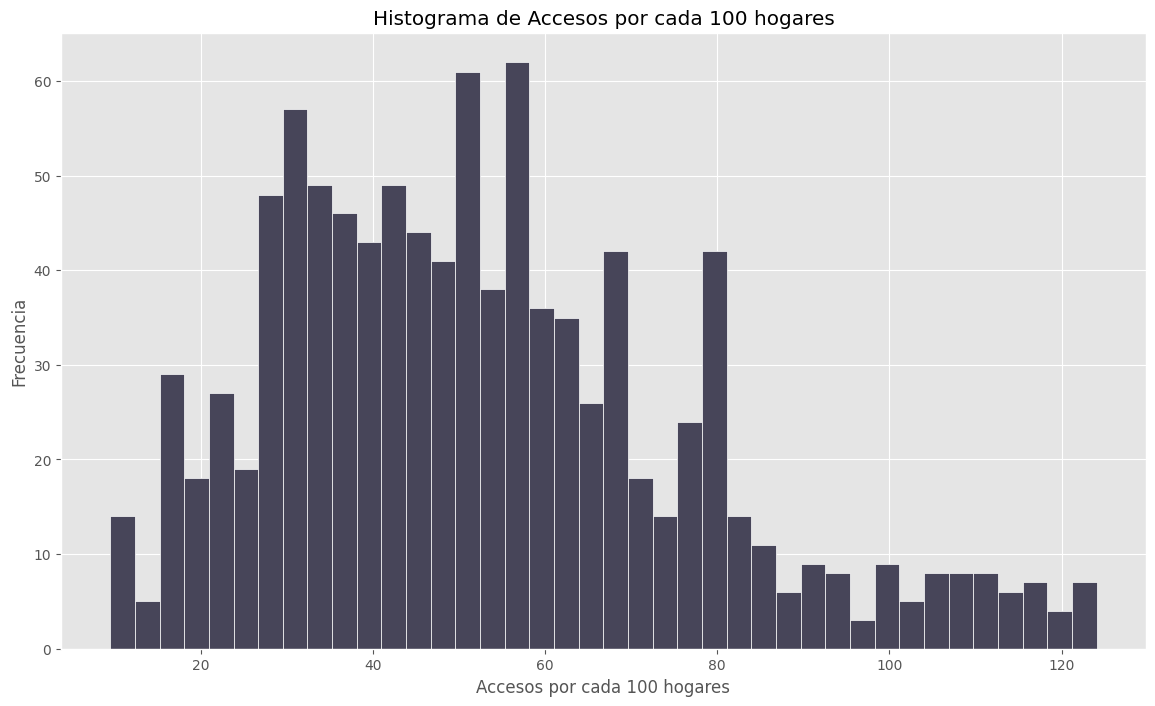

In [391]:
# Crear el histograma solo para 'Accesos por cada 100 hogares'
plt.figure(figsize=(14, 8))
plt.hist(df_1['Accesos por cada 100 hogares'], bins=40, color='#474559', edgecolor='white')
plt.title('Histograma de Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.show()

- **Observaciones**: *se observa que el histograma está sesgada hacia la derecha, como era de esperar, con una media, moda y mediana en la zona entre 40 y 60. Es decir, no hay mucho para abajo, pero sí para arriba. Este gráfico es muy diferente del siguiente porque no afecta tanto el tiempo (7 años) frente a las 24 provincias, y la distribución para ser estática. No existe valores atípicos. A continuación se observará con boxplot.*

**1.4.1.1. Boxplot del DataFrame df_1: Accesos a internet cada 100 hogares por provincia**

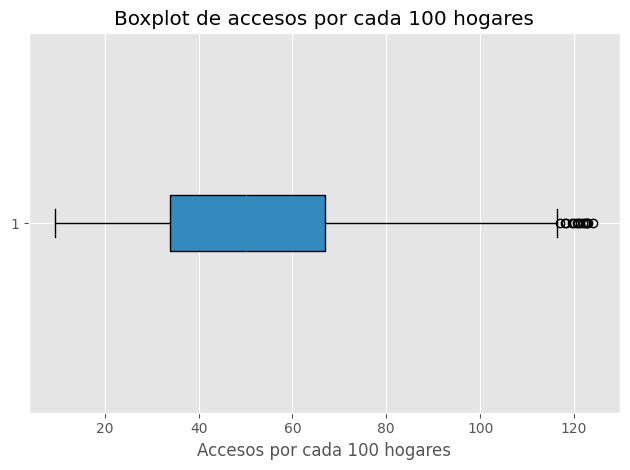

In [392]:
# Búsqueda de valores atípicos (outliers) mediante boxplots

plt.boxplot(df_1['Accesos por cada 100 hogares'], vert=False, patch_artist=True)
plt.title('Boxplot de accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.tight_layout()
plt.show()

- **Observaciones**: *se observa lo mismo que en el histograma, y se confirma que no existen valores atípicos.*

In [393]:
df_1['Accesos por cada 100 hogares'].describe()

count    1000.000000
mean       52.794973
std        24.135063
min         9.513970
25%        33.957657
50%        50.133004
75%        67.010861
max       124.061394
Name: Accesos por cada 100 hogares, dtype: float64

- **Observaciones**: se confirma que la media que oscila en 53 y la mediana en 50

**1.4.1.2. Histograma y análisis estadístico del DataFrame df_2: Accesos a internet cada 100 hogares de media a nivel nacional**

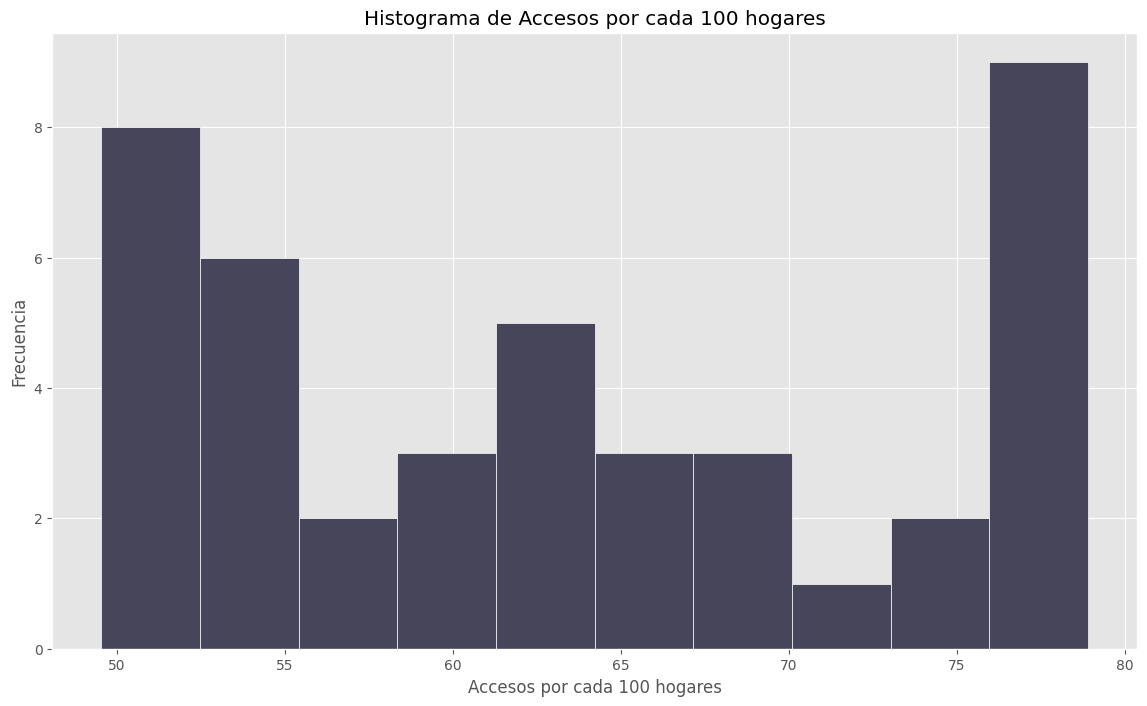

In [394]:
# Crear el histograma solo para 'Accesos por cada 100 hogares'
plt.figure(figsize=(14, 8))
plt.hist(df_2['Accesos por cada 100 hogares'], bins=10, color='#474559', edgecolor='white')
plt.title('Histograma de Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.show()

- **Observaciones**: *para analizar este histograma, es necesario entender que aquí prevalece la historia, es decir, como fue evolucionando la media nacional a lo largo del tiempo. En el 2014, la concentración era en la zona de los 50 accesos por cada 100 hogares. Se visualiza que en el 2024 la concentración es en la zona de los 75 accesos cada 100 hogares. No existen valores atípicos.* 

**1.4.1.2. Boxplot del DataFrame df_2: Accesos a internet cada 100 hogares**

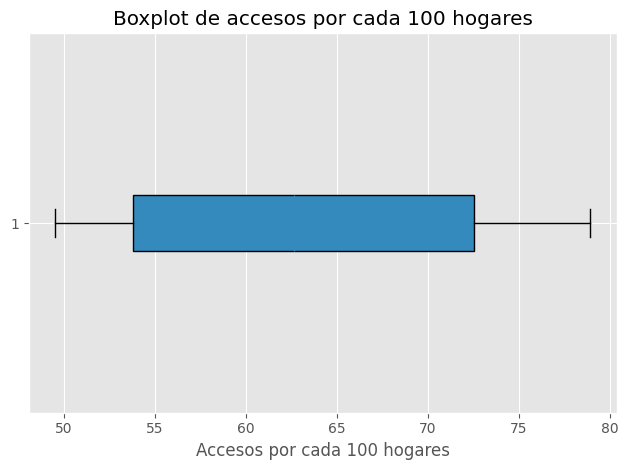

In [395]:
# Búsqueda de valores atípicos (outliers) mediante boxplots

plt.boxplot(df_2['Accesos por cada 100 hogares'], vert=False, patch_artist=True)
plt.title('Boxplot de accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.tight_layout()
plt.show()

- **Observaciones**: *se observa lo mismo que en el histograma, y se confirma que no existen valores atípicos.*

In [396]:
df_2['Accesos por cada 100 hogares'].describe()

count    42.000000
mean     63.201813
std       9.950321
min      49.545821
25%      53.784644
50%      62.667764
75%      72.527011
max      78.890000
Name: Accesos por cada 100 hogares, dtype: float64

**1.4.1.3. Histograma del DataFrame df_3: Velocidad % por prov.**

In [397]:
df_3.head(1)

Año  Trimestre     Provincia  Mbps (Media de bajada)
0  2024          2  Buenos Aires                  157.41

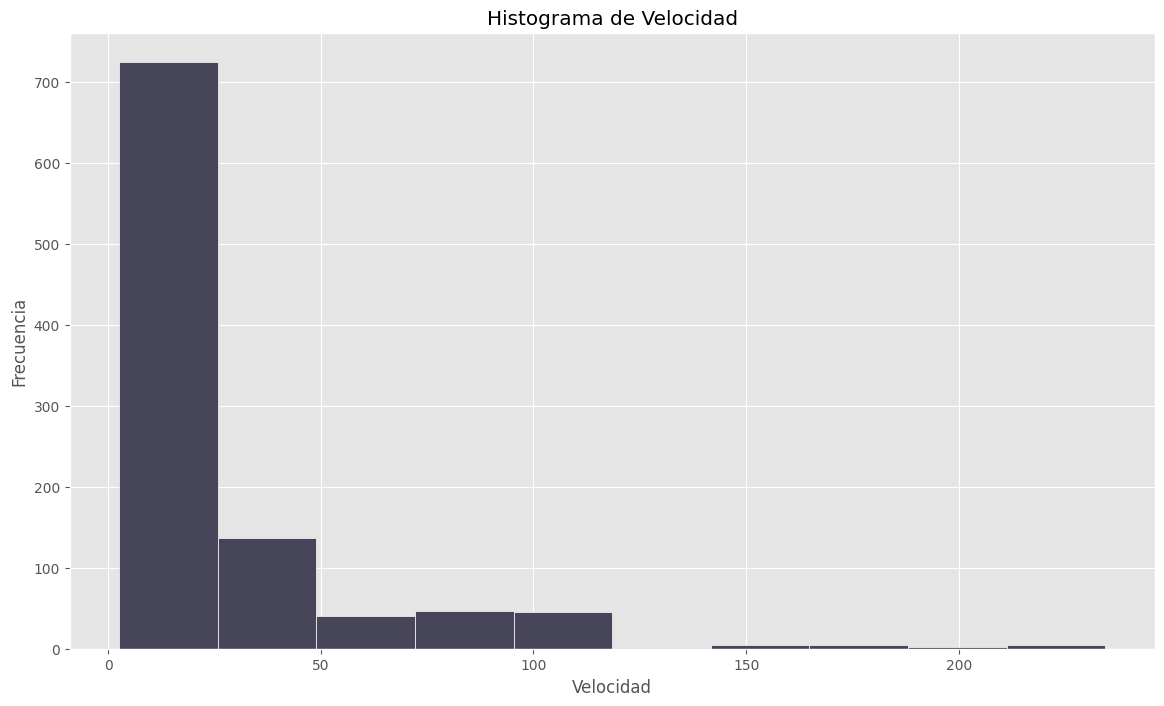

In [398]:
# Crear el histograma solo para 'Velocidad [Mbps]'
plt.figure(figsize=(14, 8))
plt.hist(df_3['Mbps (Media de bajada)'], bins=10, color='#474559', edgecolor='white')
plt.title('Histograma de Velocidad')
plt.xlabel('Velocidad')
plt.ylabel('Frecuencia')
plt.show()

- **Observaciones**: *se observa que el histograma de velocidad está muy sesgada hacia la derecha. Es decir, muy concentrado en la zona de 20 Mpbs. Se destaca que, por el momento, a partir de 120 existen valores atípicos, pero estos valores deberían ser normales en el futuro próximo, y la compañía debería buscar que la media se sitúe por encima de 100 y la distribución se aproxime más a la distribución normal tipo campana de Gauss.*

**1.4.1.3. Boxplot del DataFrame df_3: Velocidad [Mbps]**

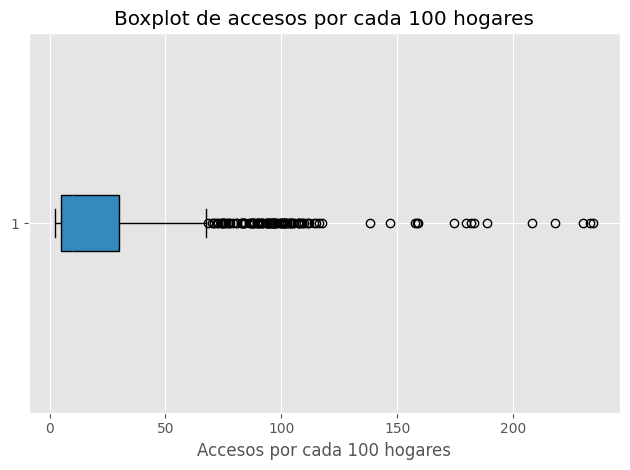

In [399]:
# Búsqueda de valores atípicos (outliers) mediante boxplots

plt.boxplot(df_3['Mbps (Media de bajada)'], vert=False, patch_artist=True)
plt.title('Boxplot de accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.tight_layout()
plt.show()

- **Observaciones**: *se observa lo mismo que en el histograma, y se confirma que por encima de 120 existen valores atípicos, y que existen hogares con accesos a internet con una velocidad de casi 250 Mbps.*

**1.4.1.4. Histograma del DataFrame df_4: Totales VMD**

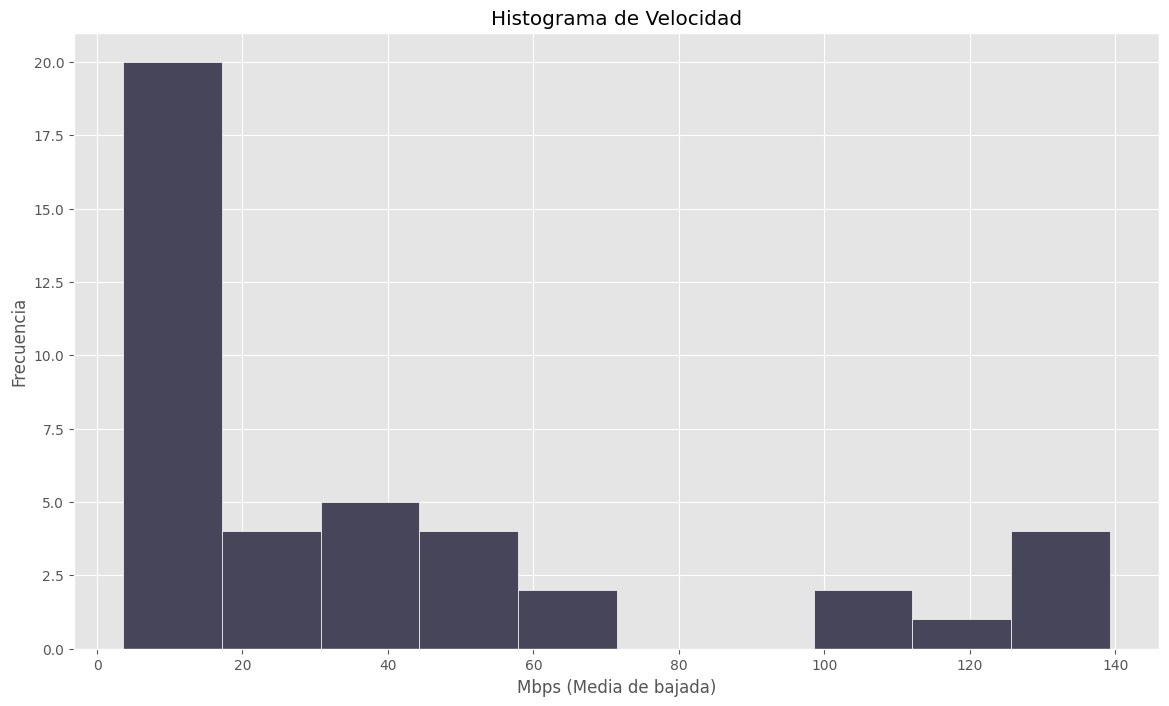

In [400]:
# Crear el histograma solo para 'Mbps (Media de bajada)'
plt.figure(figsize=(14, 8))
plt.hist(df_4['Mbps (Media de bajada)'], bins=10, color='#474559', edgecolor='white')
plt.title('Histograma de Velocidad')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Frecuencia')
plt.show()

- **Observaciones**: *se observa que el histograma de velocidad está muy sesgada hacia la derecha. Es decir, muy concentrado en la zona de 10-15 Mpbs. Se destaca que, por el momento, a partir de 100 existen valores atípicos, pero estos valores deberían ser normales en el futuro próximo, y la compañía debería buscar que la media se sitúe por encima de 100 y la distribución se aproxime más a la distribución normal tipo campana de Gauss. También se observa que los valores son promediados y por eso, la cola está más suavizada.*

**1.4.1.4. Boxplot del DataFrame df_4: Totales VMD**

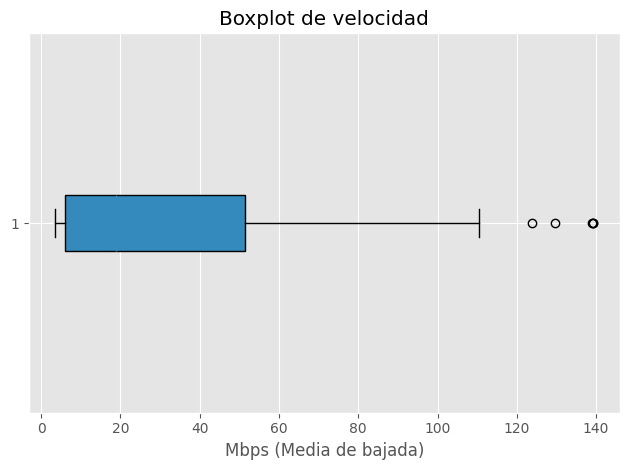

In [401]:
# Búsqueda de valores atípicos (outliers) mediante boxplots

plt.boxplot(df_4['Mbps (Media de bajada)'], vert=False, patch_artist=True)
plt.title('Boxplot de velocidad')
plt.xlabel('Mbps (Media de bajada)')
plt.tight_layout()
plt.show()

- **Observaciones**: *se observa lo mismo que en el histograma, y se confirma que por encima de 120 existen valores atípicos.*

**1.4.1.5. Histograma del DataFrame df_5: Accesos Por Tecnología**

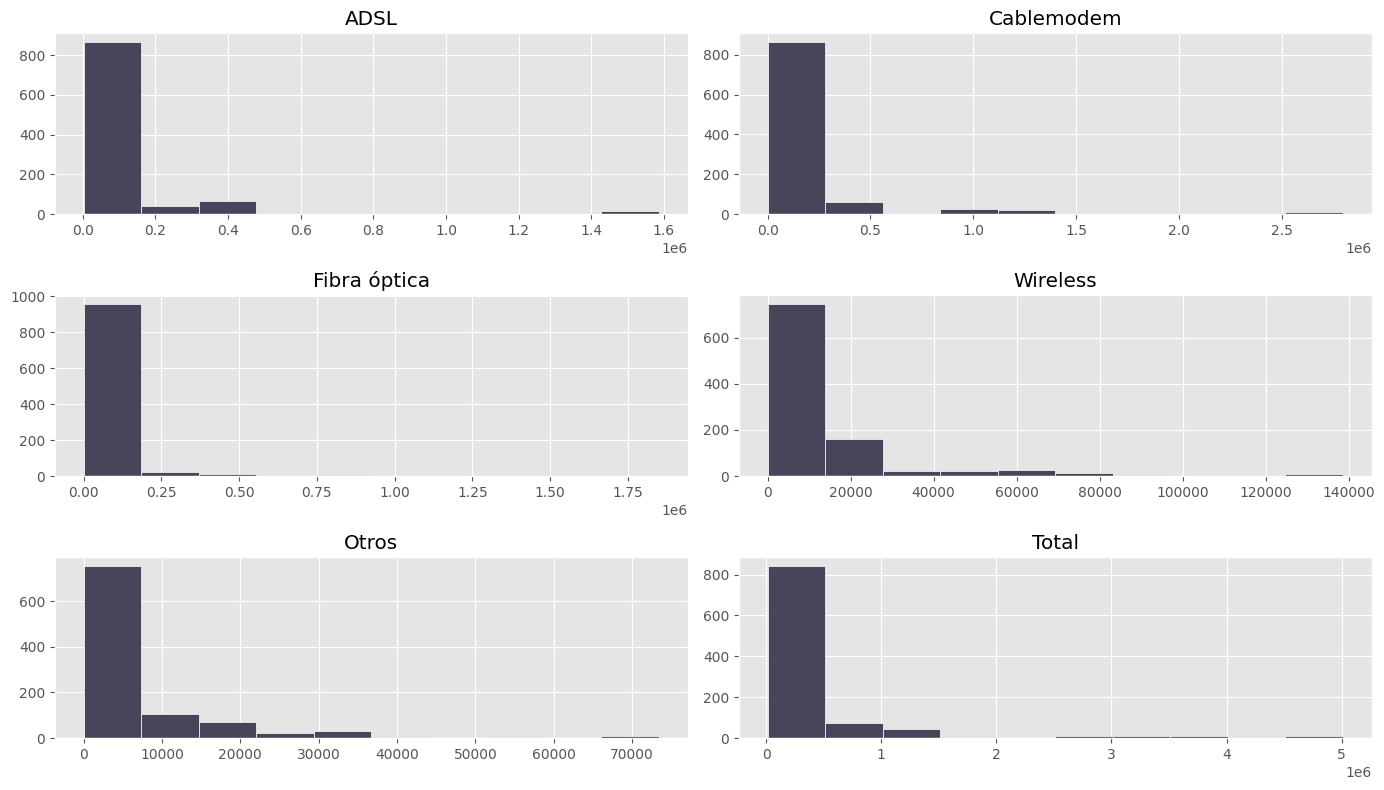

In [402]:
# Definir las columnas que se quieren graficar
columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']                        

numeric_columns = df_5[columns]
num_columns = len(numeric_columns.columns)

num_rows = (num_columns // 2) + (num_columns % 2)
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))

axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    axes[i].hist(df_5[col], bins=10, color='#474559', edgecolor='white')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

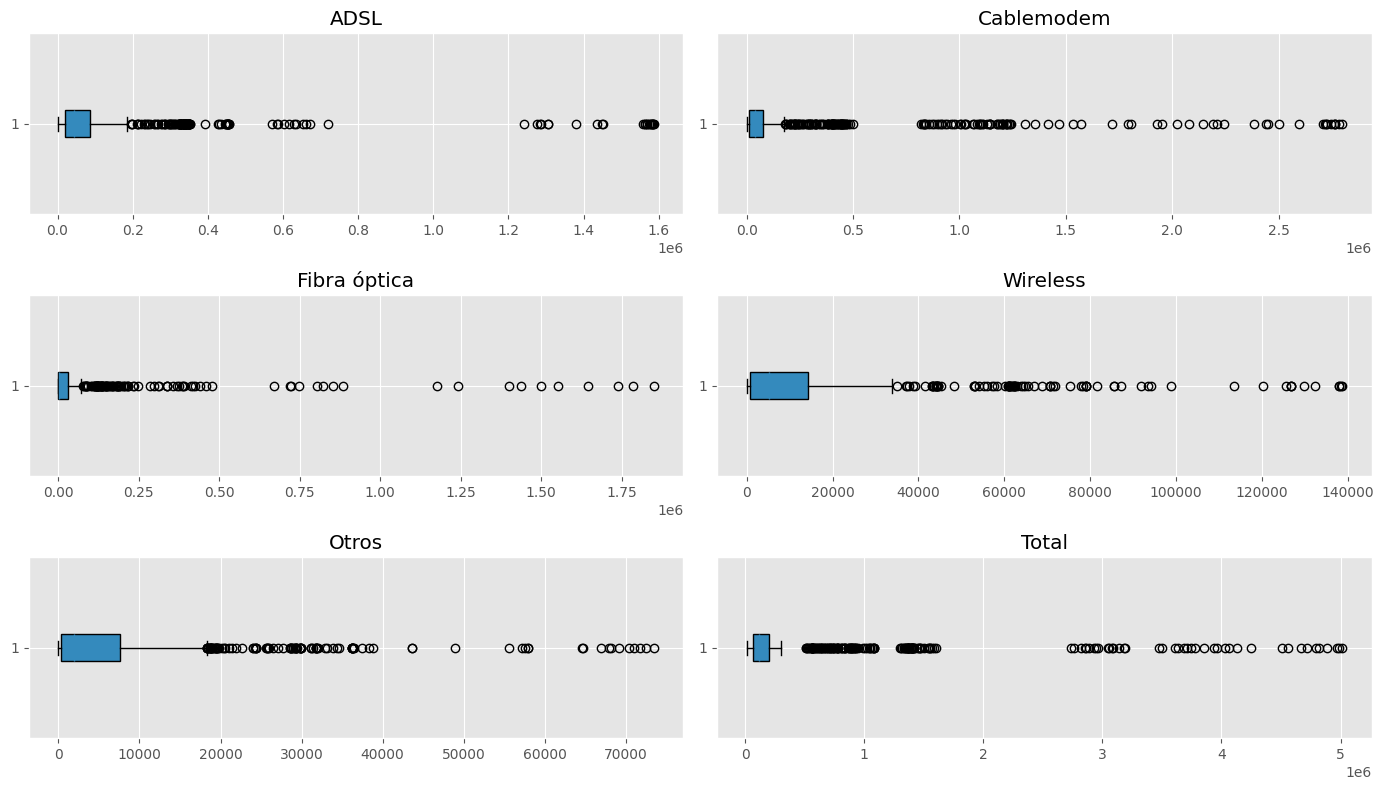

In [403]:
# Definir las columnas que se quieren graficar
columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']                        

numeric_columns = df_5[columns]
num_columns = len(numeric_columns.columns)

num_rows = (num_columns // 2) + (num_columns % 2)
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))

axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    axes[i].boxplot(df_5[col], vert=False, patch_artist=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

**Observaciones**: se observa que todas las tecnologías estan sesgadas a la derecha indicando que la mediana se haya en el extremo inferior.

**1.4.1.6. Histograma del DataFrame df_6: Totales accesos por tecnología**

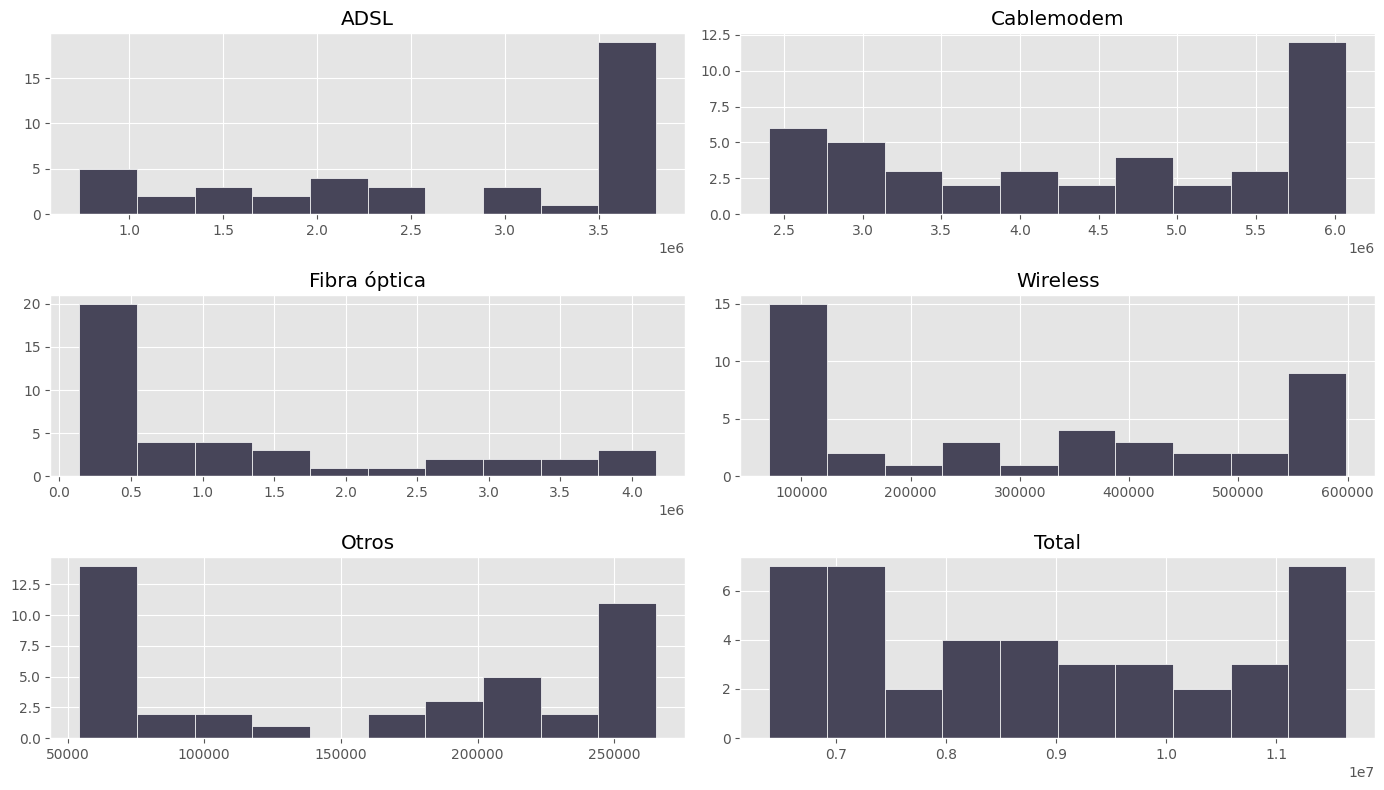

In [404]:
# Definir las columnas que se quieren graficar
columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']                        

numeric_columns = df_6[columns]
num_columns = len(numeric_columns.columns)

num_rows = (num_columns // 2) + (num_columns % 2)
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))

axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    axes[i].hist(df_6[col], bins=10, color='#474559', edgecolor='white')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

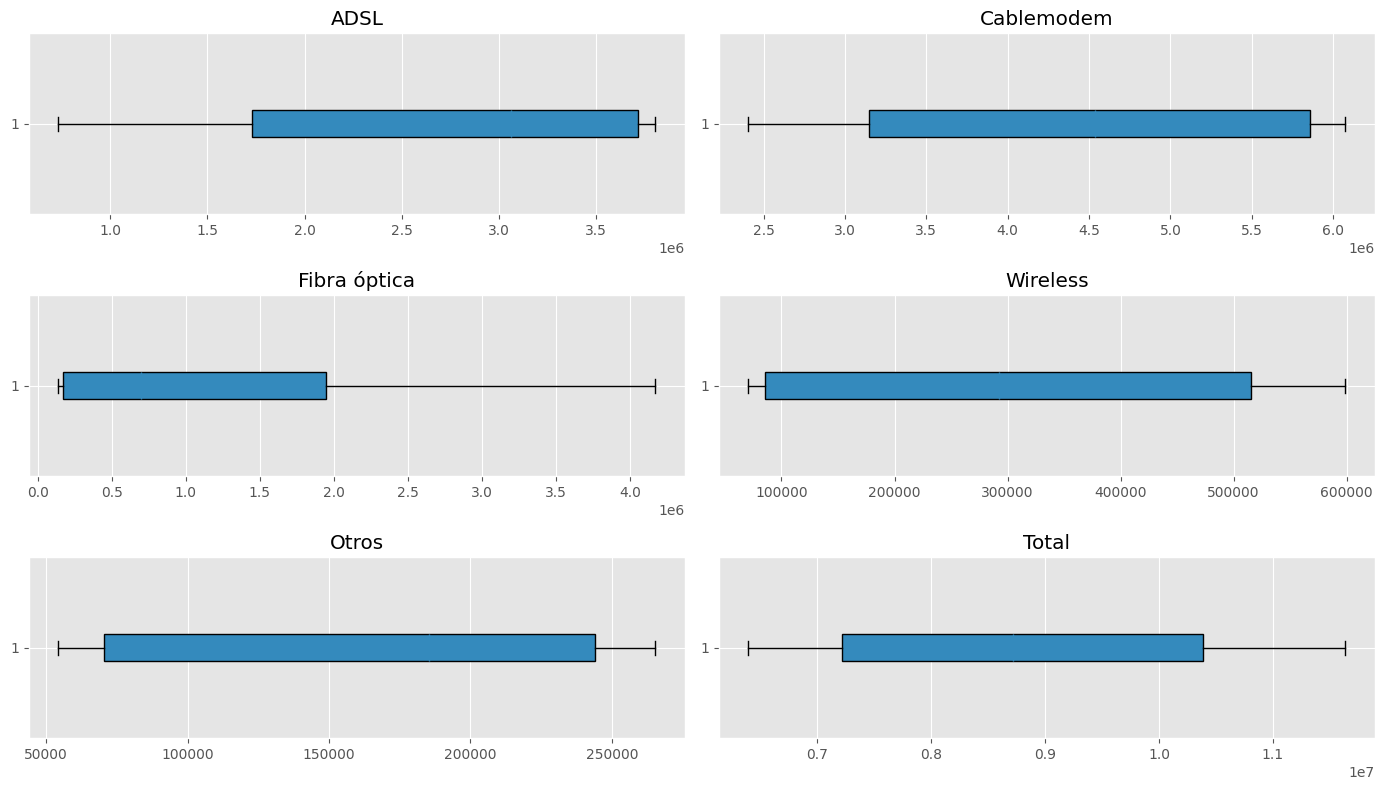

In [405]:
# Definir las columnas que se quieren graficar
columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']                        

numeric_columns = df_6[columns]
num_columns = len(numeric_columns.columns)

num_rows = (num_columns // 2) + (num_columns % 2)
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))

axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    axes[i].boxplot(df_6[col], vert=False, patch_artist=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

**Observaciones**: se observa que no existen valores atípicos. La mayoría de las tecnologías estan sesgadas y no representan algo certero por lo mencionado en las consideraciones. No hay valores atípicos porque están suavizados porque es una media de las provincias y del rango de tiempo.

**1.4.1.7. Histograma del DataFrame df_7: Dial-BAf**

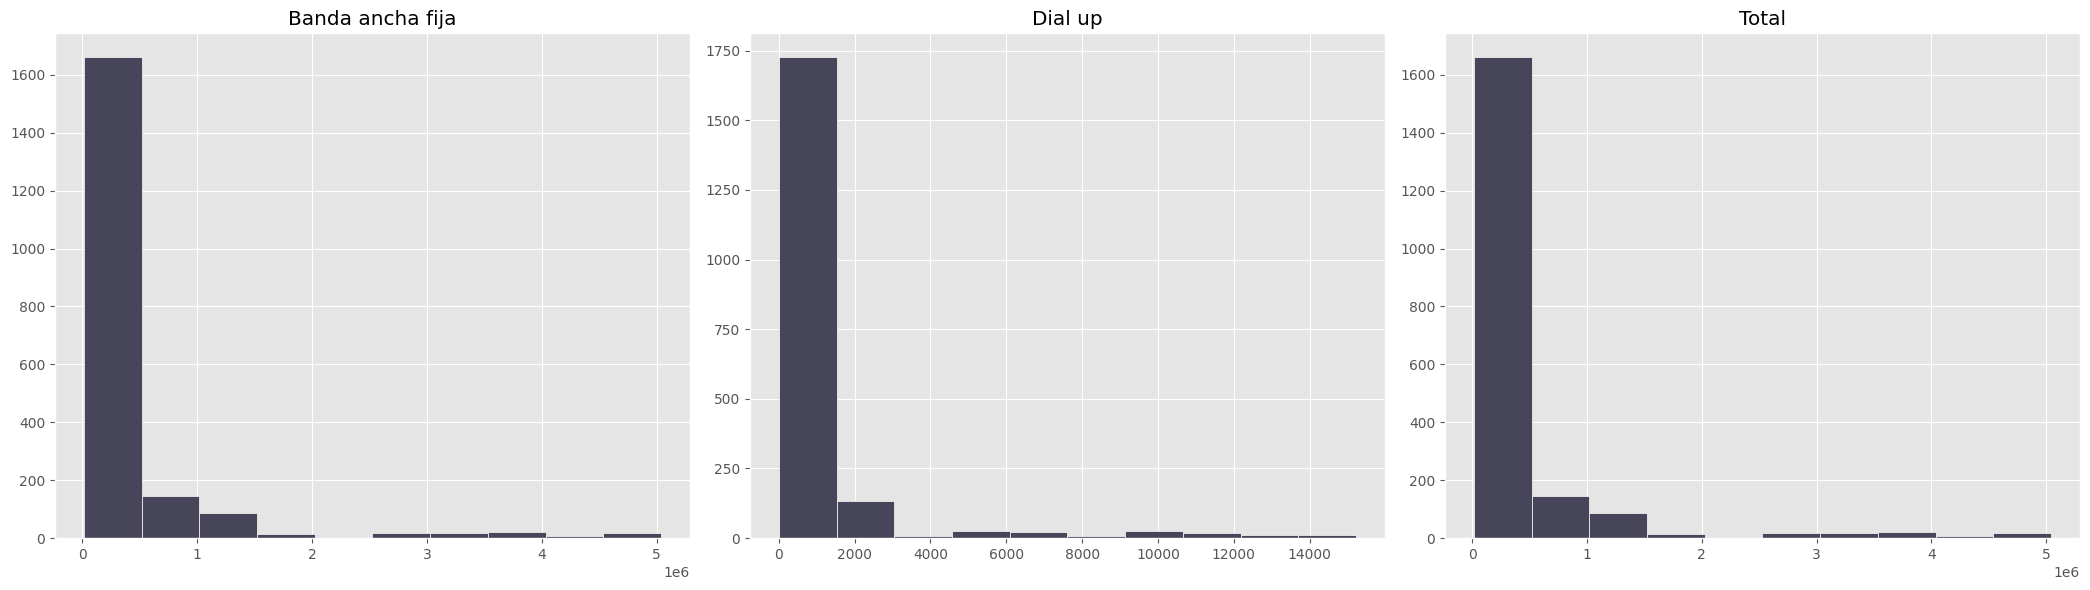

In [406]:
# Definir las columnas que se quieren graficar
columns = ['Banda ancha fija', 'Dial up', 'Total']                        

numeric_columns = df_7[columns]
num_columns = len(numeric_columns.columns)

num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 6))

axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    axes[i].hist(df_7[col], bins=10, color='#474559', edgecolor='white')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

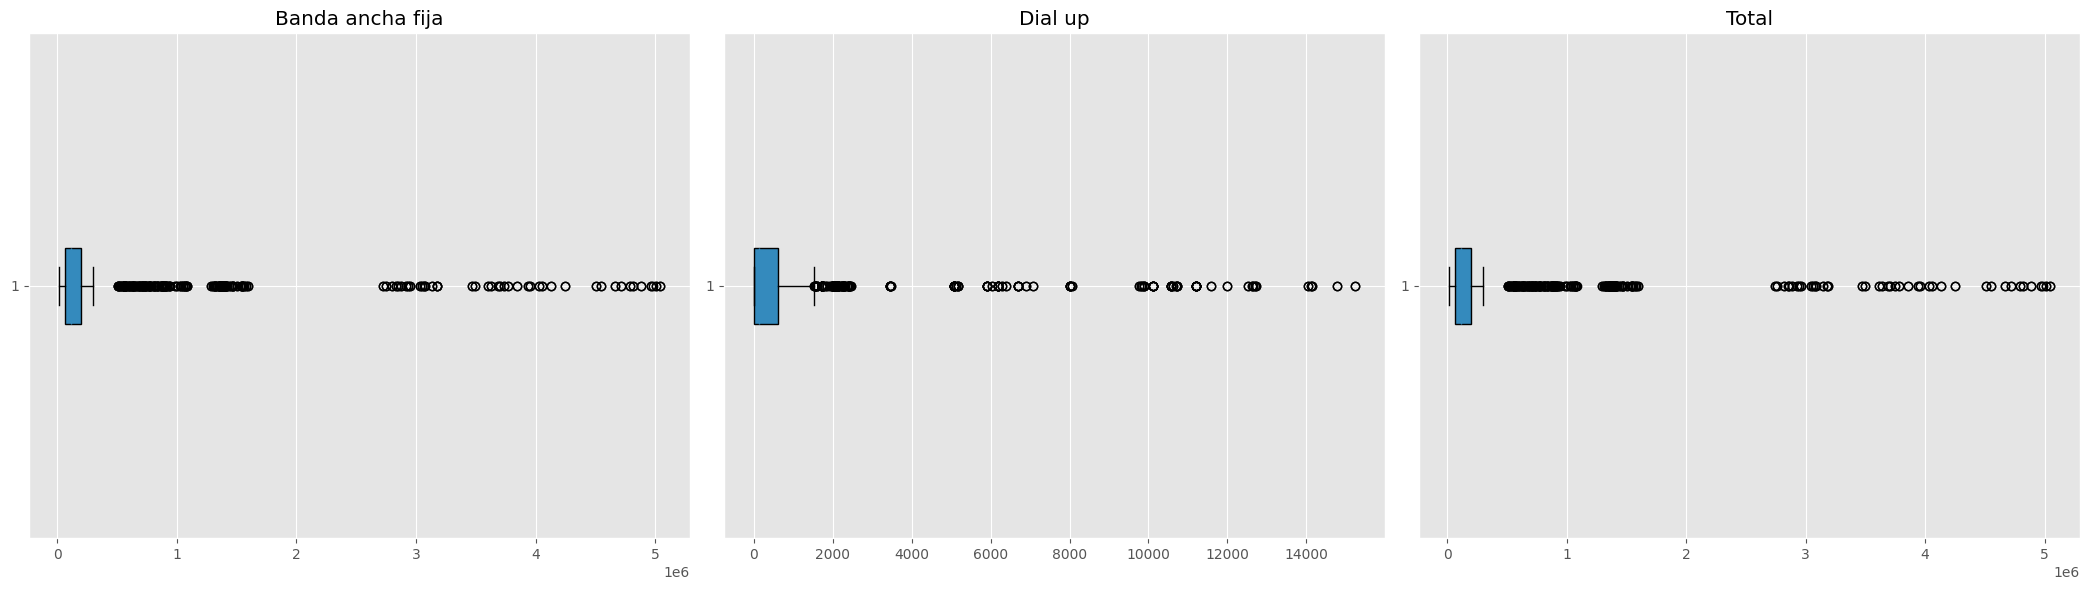

In [407]:
# Definir las columnas que se quieren graficar
columns = ['Banda ancha fija', 'Dial up', 'Total']                        

numeric_columns = df_7[columns]
num_columns = len(numeric_columns.columns)

num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 6))

axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    axes[i].boxplot(df_7[col], vert=False, patch_artist=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

**Observaciones**: se observa un gráfico muy similar al de las tecnologías por provincias. La gráfica de Banda ancha fija prácticamente coincide con el total porque Dial up está en desuso. 

**1.4.1.8. Histograma del DataFrame df_8: Totales Dial-BAf**

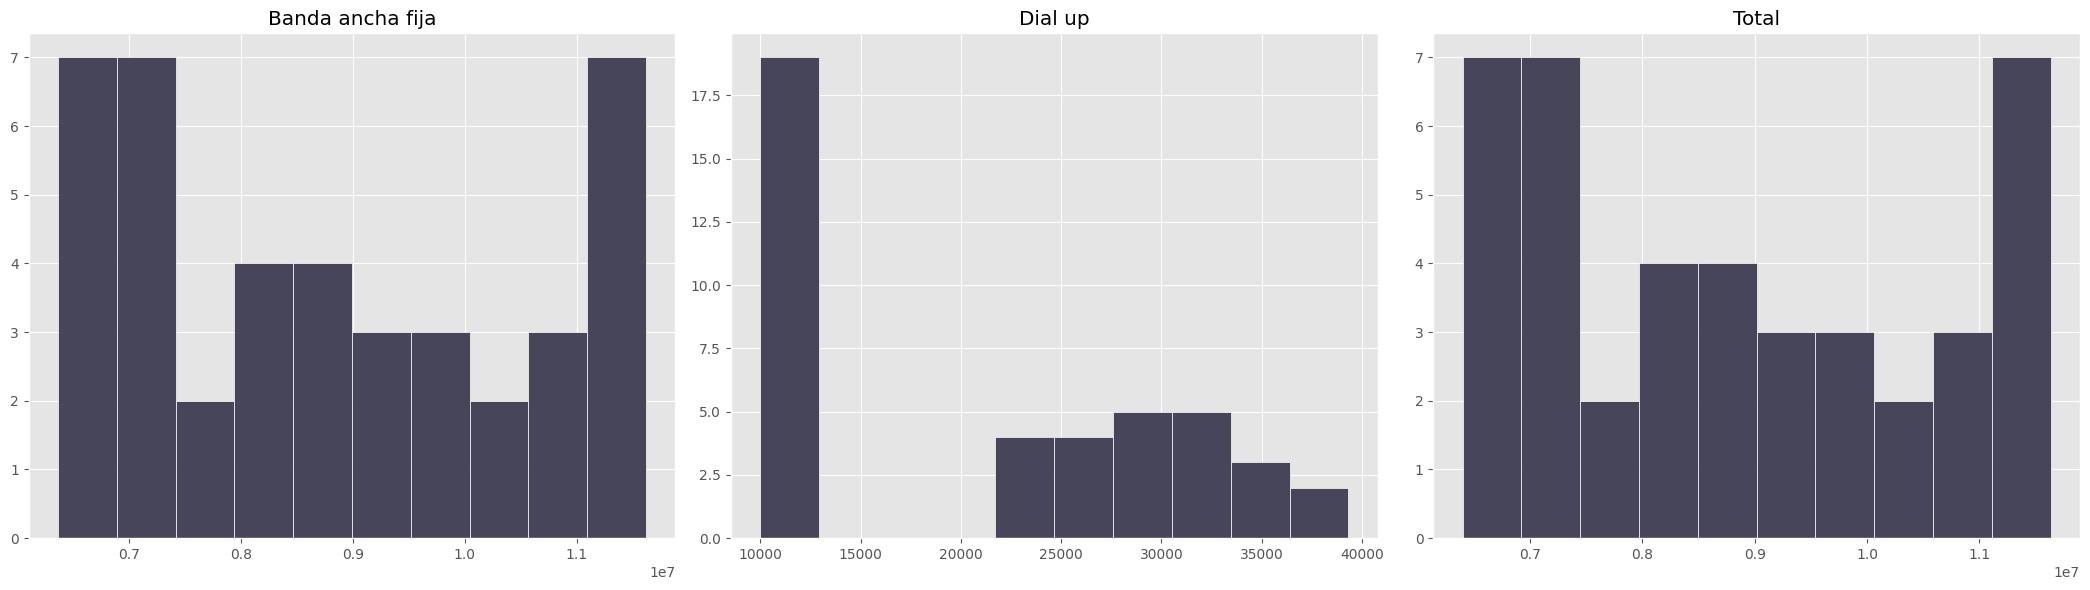

In [408]:
# Definir las columnas que se quieren graficar
columns = ['Banda ancha fija', 'Dial up', 'Total']                        

numeric_columns = df_8[columns]
num_columns = len(numeric_columns.columns)

num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 6))

axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    axes[i].hist(df_8[col], bins=10, color='#474559', edgecolor='white')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

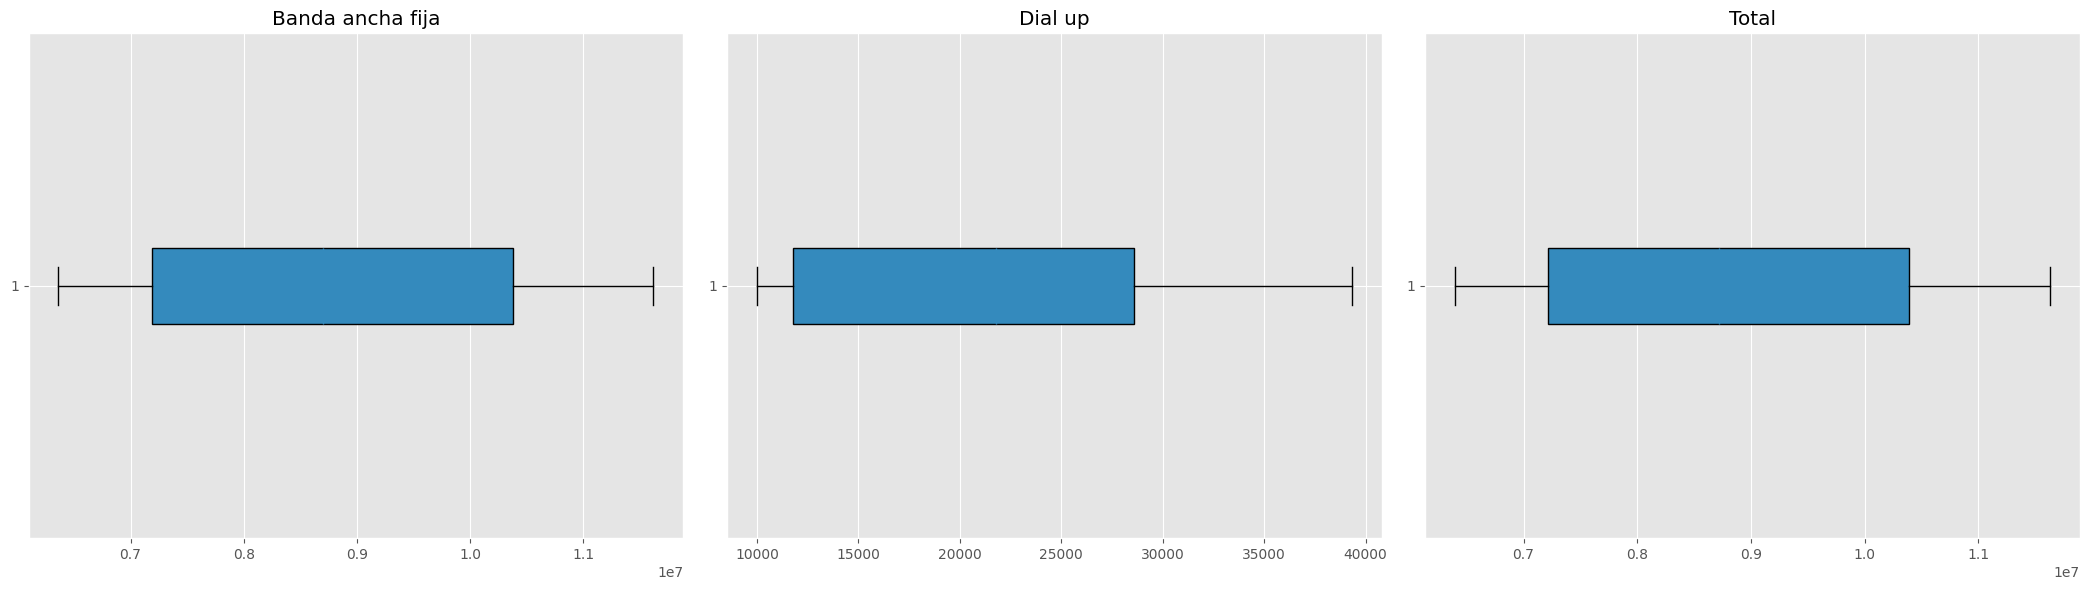

In [409]:
# Definir las columnas que se quieren graficar
columns = ['Banda ancha fija', 'Dial up', 'Total']                        

numeric_columns = df_8[columns]
num_columns = len(numeric_columns.columns)

num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 6))

axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    axes[i].boxplot(df_8[col], vert=False, patch_artist=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

**Observaciones**: se observa que no existen valores atípicos porque están suavizados por ser una media de las provincias y del rango de tiempo.

**1.4.1.9. Histograma del DataFrame df_9: Ingresos**

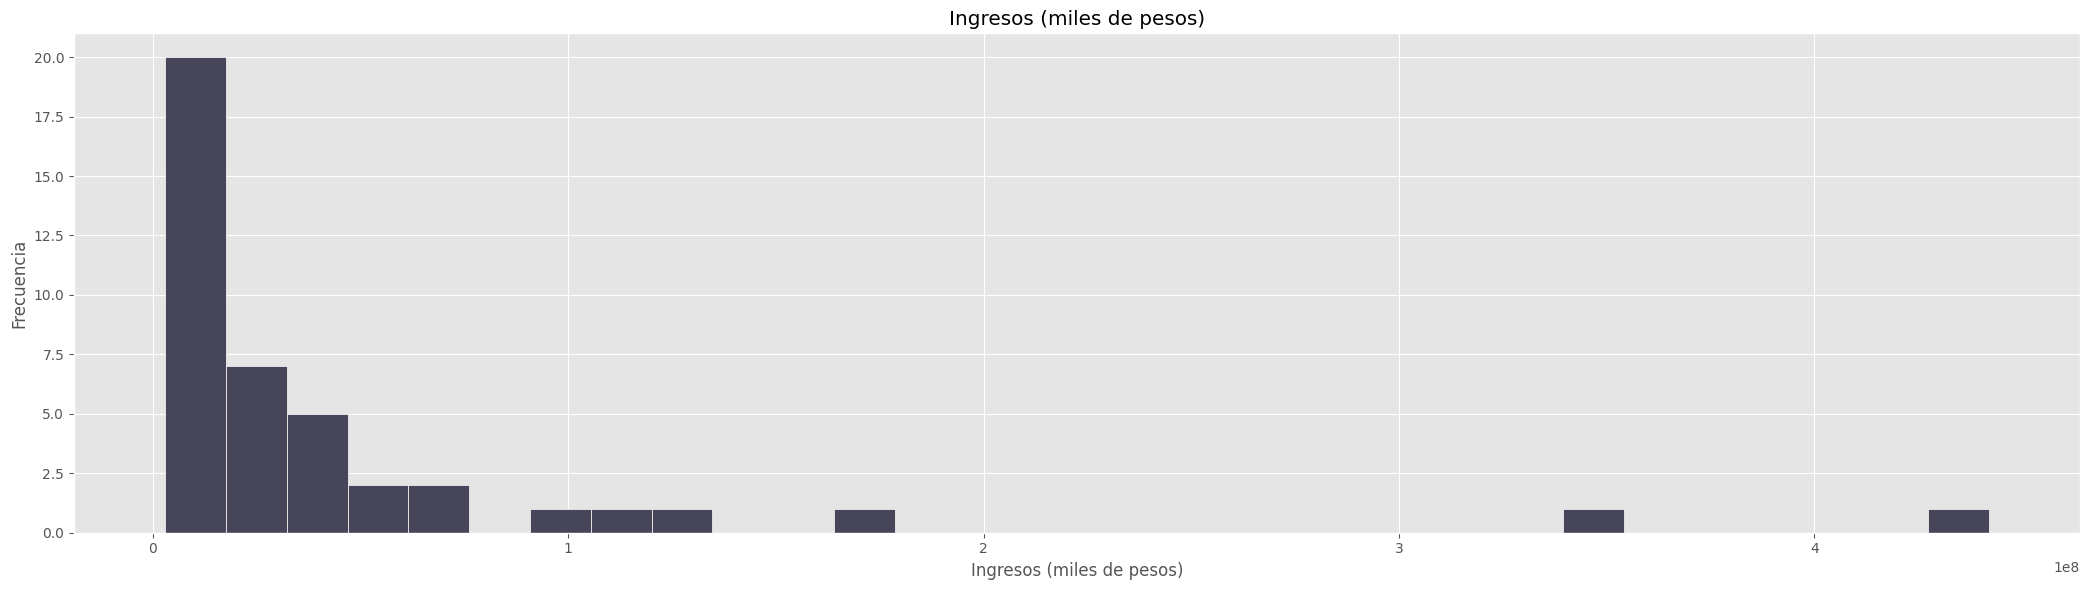

In [410]:
# Definir las columnas que se quieren graficar
columns = ['Ingresos (miles de pesos)']                        

numeric_columns = df_9[columns]

# Crear el gráfico de histograma
plt.figure(figsize=(21, 6))
plt.hist(numeric_columns['Ingresos (miles de pesos)'], bins=30, color='#474559', edgecolor='white')
plt.title('Ingresos (miles de pesos)')
plt.xlabel('Ingresos (miles de pesos)')
plt.ylabel('Frecuencia')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

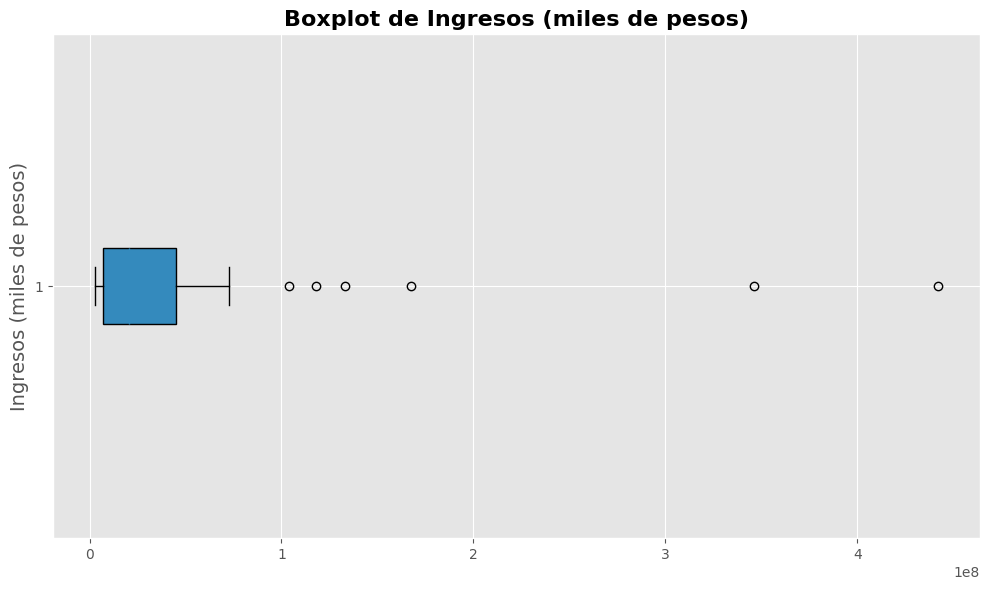

In [411]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df_9['Ingresos (miles de pesos)'], vert=False, patch_artist=True)

# Añadir títulos y etiquetas
plt.title('Boxplot de Ingresos (miles de pesos)', fontsize=16, fontweight='bold')
plt.ylabel('Ingresos (miles de pesos)', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Observaciones**: da la impresión de que existen valores atípicos pero, probablemente sean por la inflacion. También es de notar, que hubo un aceleramiento de la inflación en el 2023-2024 y ha causado estos valores. Más adelante se analizarás con mejor detalle.

#### 1.5. Análisis de tendencia

##### 1.5.1. Análisis de tendencia en la hoja: 'Penetracion-hogares'

In [412]:
df_1['Fecha'] = pd.to_datetime(df_1['Año'].astype(str) + 'Q' + df_1['Trimestre'].astype(str))

In [413]:
df_1

Año  Trimestre        Provincia  Accesos por cada 100 hogares      Fecha
0    2024          2     Buenos Aires                     79.840000 2024-04-01
1    2024          2  Capital Federal                    116.370000 2024-04-01
2    2024          2        Catamarca                     68.810000 2024-04-01
3    2024          2            Chaco                     44.060000 2024-04-01
4    2024          2           Chubut                     86.330000 2024-04-01
..    ...        ...              ...                           ...        ...
995  2014          1         La Rioja                     16.294105 2014-01-01
996  2014          1          Mendoza                     31.913123 2014-01-01
997  2014          1         Misiones                     23.136539 2014-01-01
998  2014          1          Neuquén                     49.791605 2014-01-01
999  2014          1        Río Negro                     44.913957 2014-01-01

[1000 rows x 5 columns]

##### 1.5.1.1. Visualización diferenciada por provincias

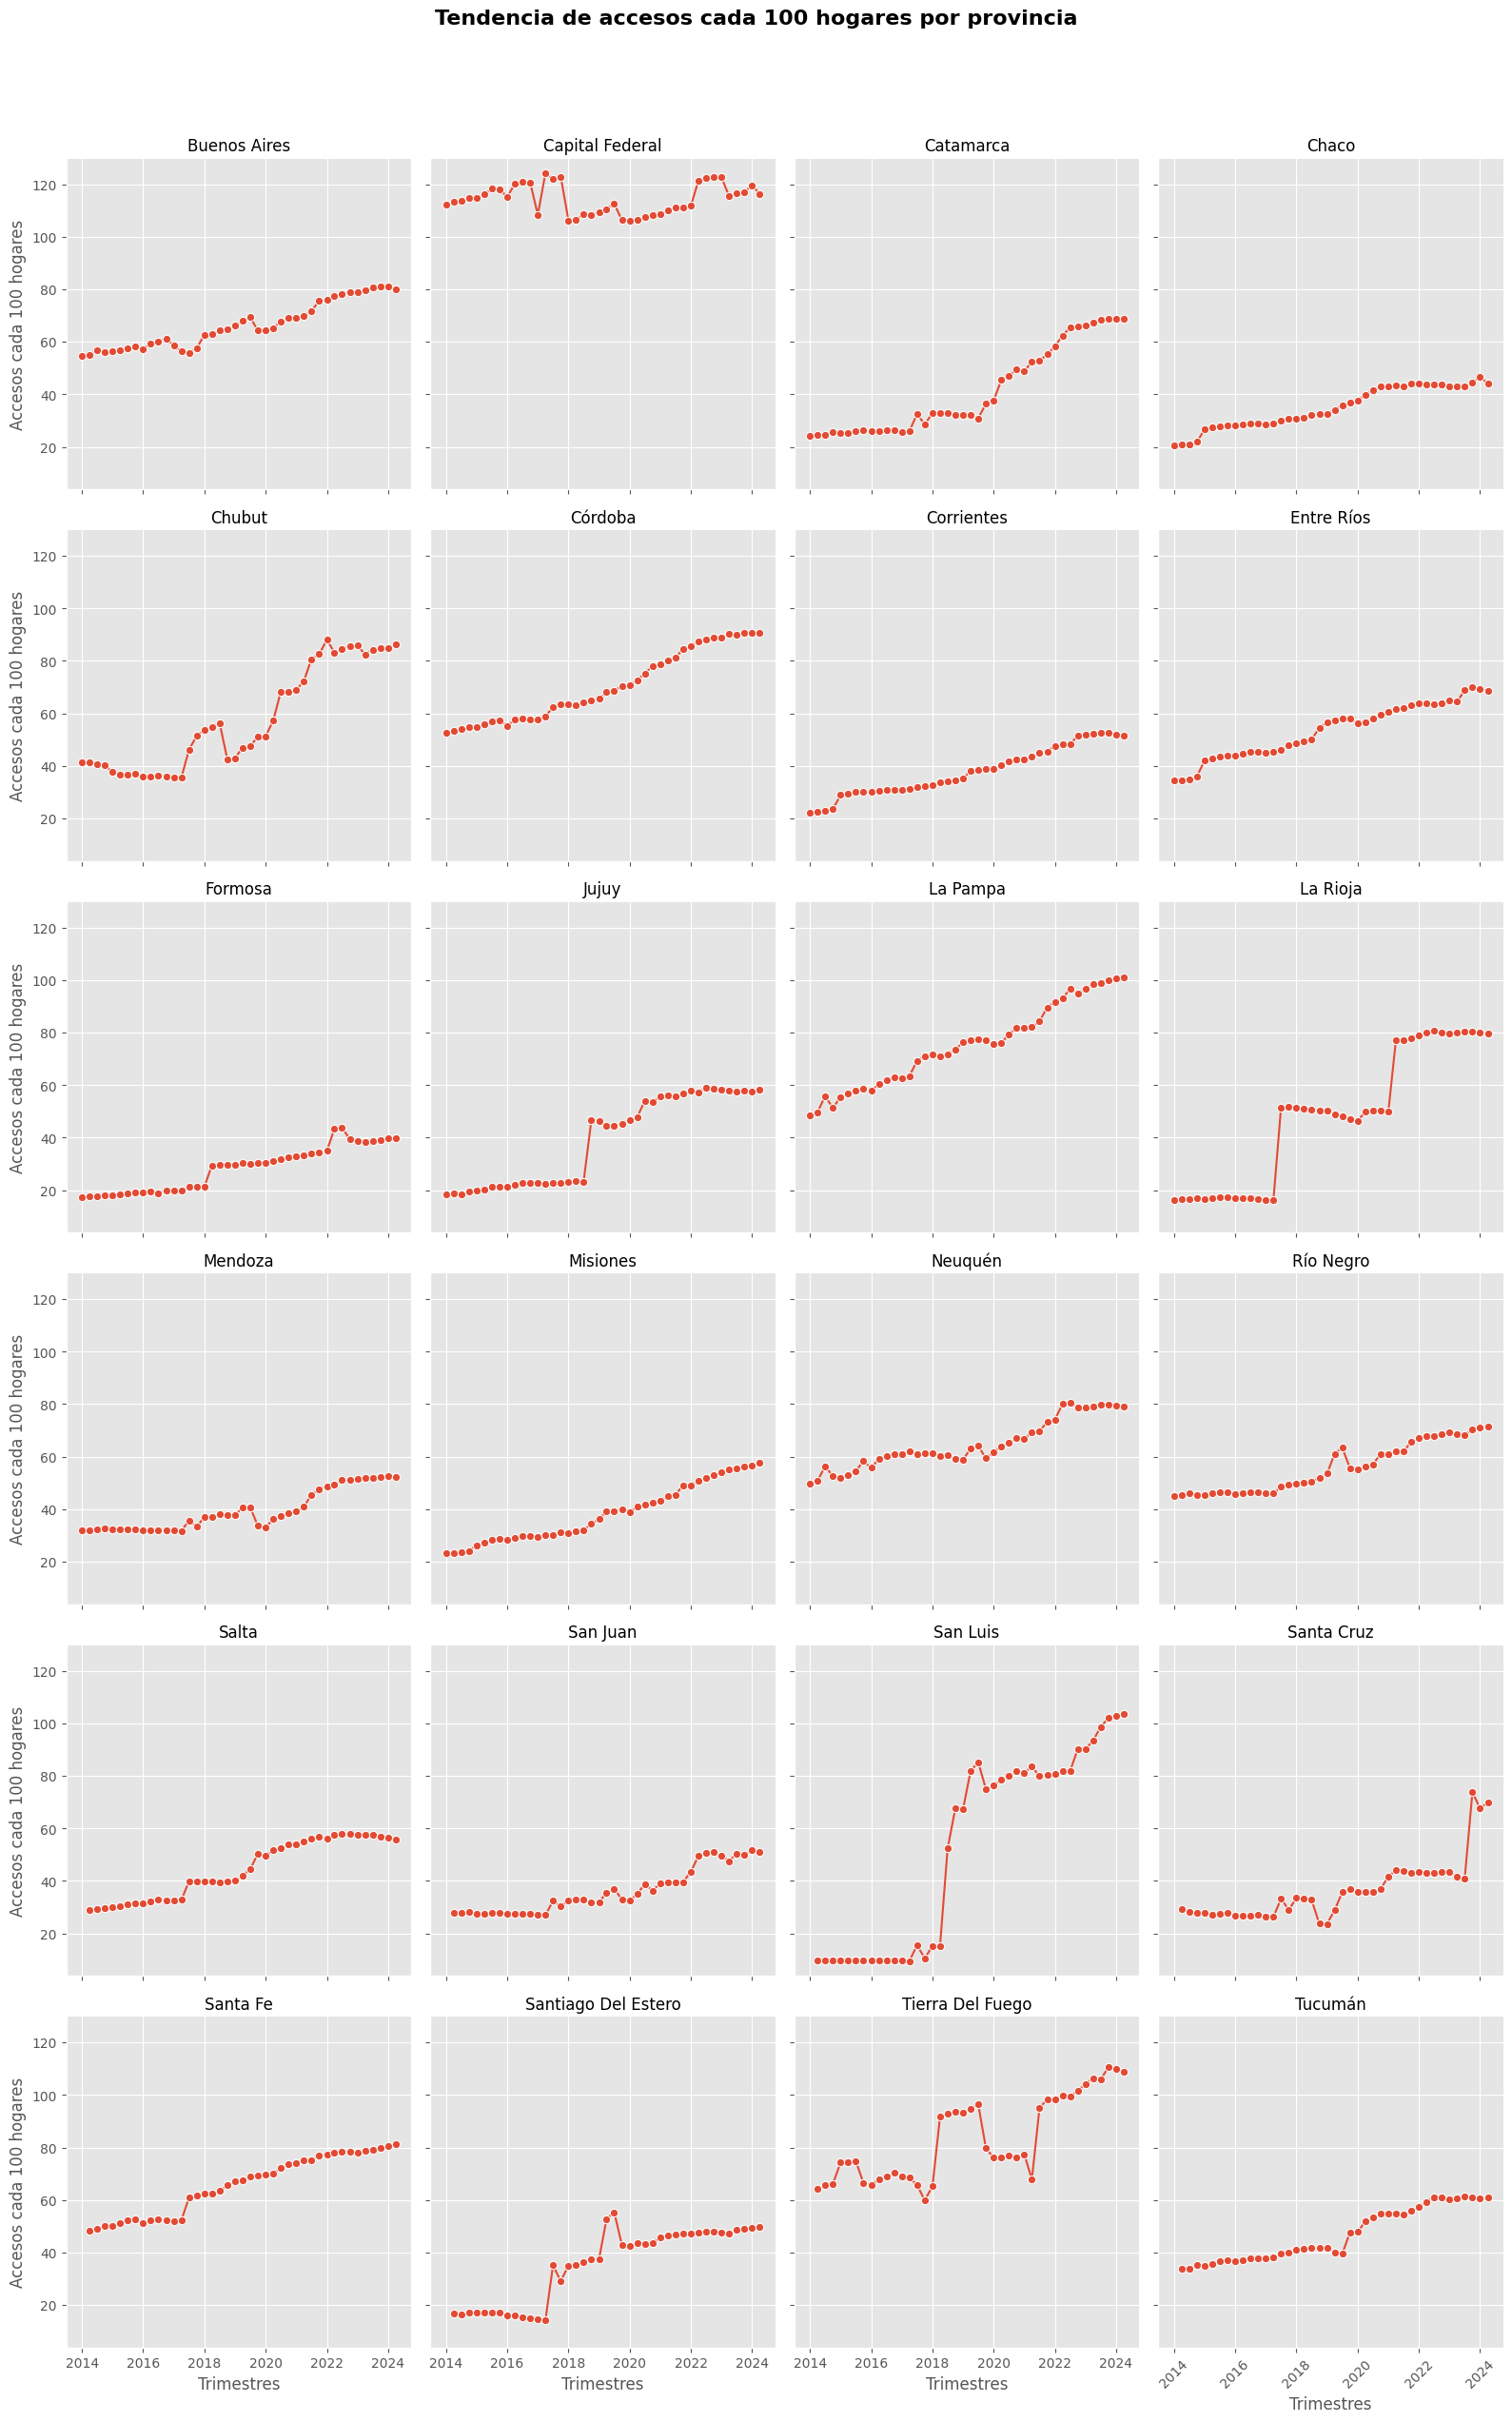

In [414]:
g = sns.FacetGrid(df_1, col='Provincia', col_wrap=4, height=4)
g.map(sns.lineplot, 'Fecha', 'Accesos por cada 100 hogares', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Trimestres', 'Accesos cada 100 hogares')
g.fig.suptitle('Tendencia de accesos cada 100 hogares por provincia', y=1.05, fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

* El gráfico anterior se visualiza correctamente. No obstante, a continuación se mostrará un gráfico interactivo para seleccionar por las provincias que se quieran analizar.

##### 1.5.1.2. Visualización por selección de provincias

In [415]:
fig = px.line(df_1, x='Fecha', y='Accesos por cada 100 hogares', color='Provincia', markers=True, 
              title='Tendencia de accesos cada 100 hogares por provincia')

# Personalizar el título 
fig.update_layout(title=
                  {'text': 'Tendencia de accesos cada 100 hogares por provincia', 
                    'font': { 
                        'size': 16, 'color': 'black', 
                        'family': 'Arial, sans-serif', 
                        'weight': 'bold' # Aunque 'weight' es más para CSS, mantiene el ejemplo 
                    }, 
                    'x': 0.5, 
                    'xanchor': 'center' 
                    },
                  height=800
                  )

fig.update_xaxes(title_text='Trimestres')
fig.update_yaxes(title_text='Accesos cada 100 hogares')
fig.update_layout(legend_title_text='Provincia')
fig.show()

* **Observaciones**: 
* **Tendencia**: se observa que la prácticamente todas las provincias han incrementado los accesos cada 100 hogares. También se nota que es dificil que una provincia pueda superar los 100 accesos por hogar, confirmando la hipótesis inicial. Capital Federal se mantiene constante por ejemplo, en términos de 115 accesos por hogar, mostrando que es muy dificil aumentar dicho valor. También se observa que muchas provincias en el 2014 tenían muy pocos accesos a internet, en la zona de 0-20, como ser: Santiago del Estero, San Luis, La Rioja, Formosa, Jujuy y Chaco, y otras provincias con poco más de 20. Y hoy cuentan con media de 60, habiendo quedado relegadas las provincias de Chaco y Formosa con 40 accesos. Se podría buscar que ser vuelva a doblar (x2) durante los próximos 5 años (2030).
* **Patrones**: se observa cierto patrón con la población en las repectivas provincias, pero no es un patrón muy claro. Existen excepciones como Tierra del Fuego o La Pampa, que aunque tengan poca población, tienen muchos accesos cada 100 hogares.

##### 1.5.2. Análisis de tendencia en la hoja: 'Penetracion-totales'

In [416]:
df_2['Fecha'] = pd.to_datetime(df_2['Año'].astype(str) + 'Q' + df_2['Trimestre'].astype(str))

In [417]:
df_2.head()

Año  Trimestre  Accesos por cada 100 hogares      Fecha
0  2024          2                         78.13 2024-04-01
1  2024          1                         78.89 2024-01-01
2  2023          4                         78.56 2023-10-01
3  2023          3                         77.84 2023-07-01
4  2023          2                         77.02 2023-04-01

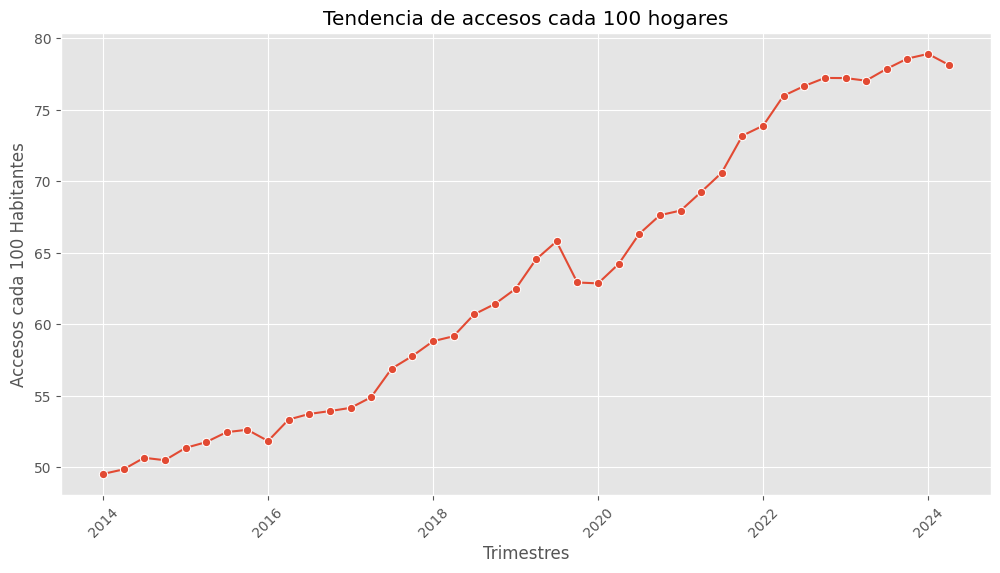

In [418]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_2, x='Fecha', y='Accesos por cada 100 hogares', marker='o')
plt.title('Tendencia de accesos cada 100 hogares')
plt.xlabel('Trimestres')
plt.ylabel('Accesos cada 100 Habitantes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

* **Observaciones**: se observa una tendencia claramente ascendente con ciertos valles pero ascendente en fin. En un análisis de regresión podria resolverse en que grado polinómico ajusta mejor. Pero para construir un KPI en este MVP, podría ser suficiente con exigir un poco más del crecimiento histórico.

##### 1.5.3. Análisis de tendencia en la hoja: 'Velocidad % por prov'

In [419]:
df_3['Fecha'] = pd.to_datetime(df_3['Año'].astype(str) + 'Q' + df_3['Trimestre'].astype(str))

In [420]:
df_3

Año  Trimestre            Provincia  Mbps (Media de bajada)      Fecha
0     2024          2         Buenos Aires              157.410000 2024-04-01
1     2024          2      Capital Federal              233.010000 2024-04-01
2     2024          2            Catamarca               97.380000 2024-04-01
3     2024          2                Chaco              107.760000 2024-04-01
4     2024          2               Chubut               21.670000 2024-04-01
...    ...        ...                  ...                     ...        ...
1003  2014          1           Santa Cruz                3.315991 2014-01-01
1004  2014          1             Santa Fe                3.147407 2014-01-01
1005  2014          1  Santiago Del Estero                2.949472 2014-01-01
1006  2014          1     Tierra Del Fuego                3.446888 2014-01-01
1007  2014          1              Tucumán                3.208342 2014-01-01

[1008 rows x 5 columns]

##### 1.5.3.1. Visualización diferenciada por provincias

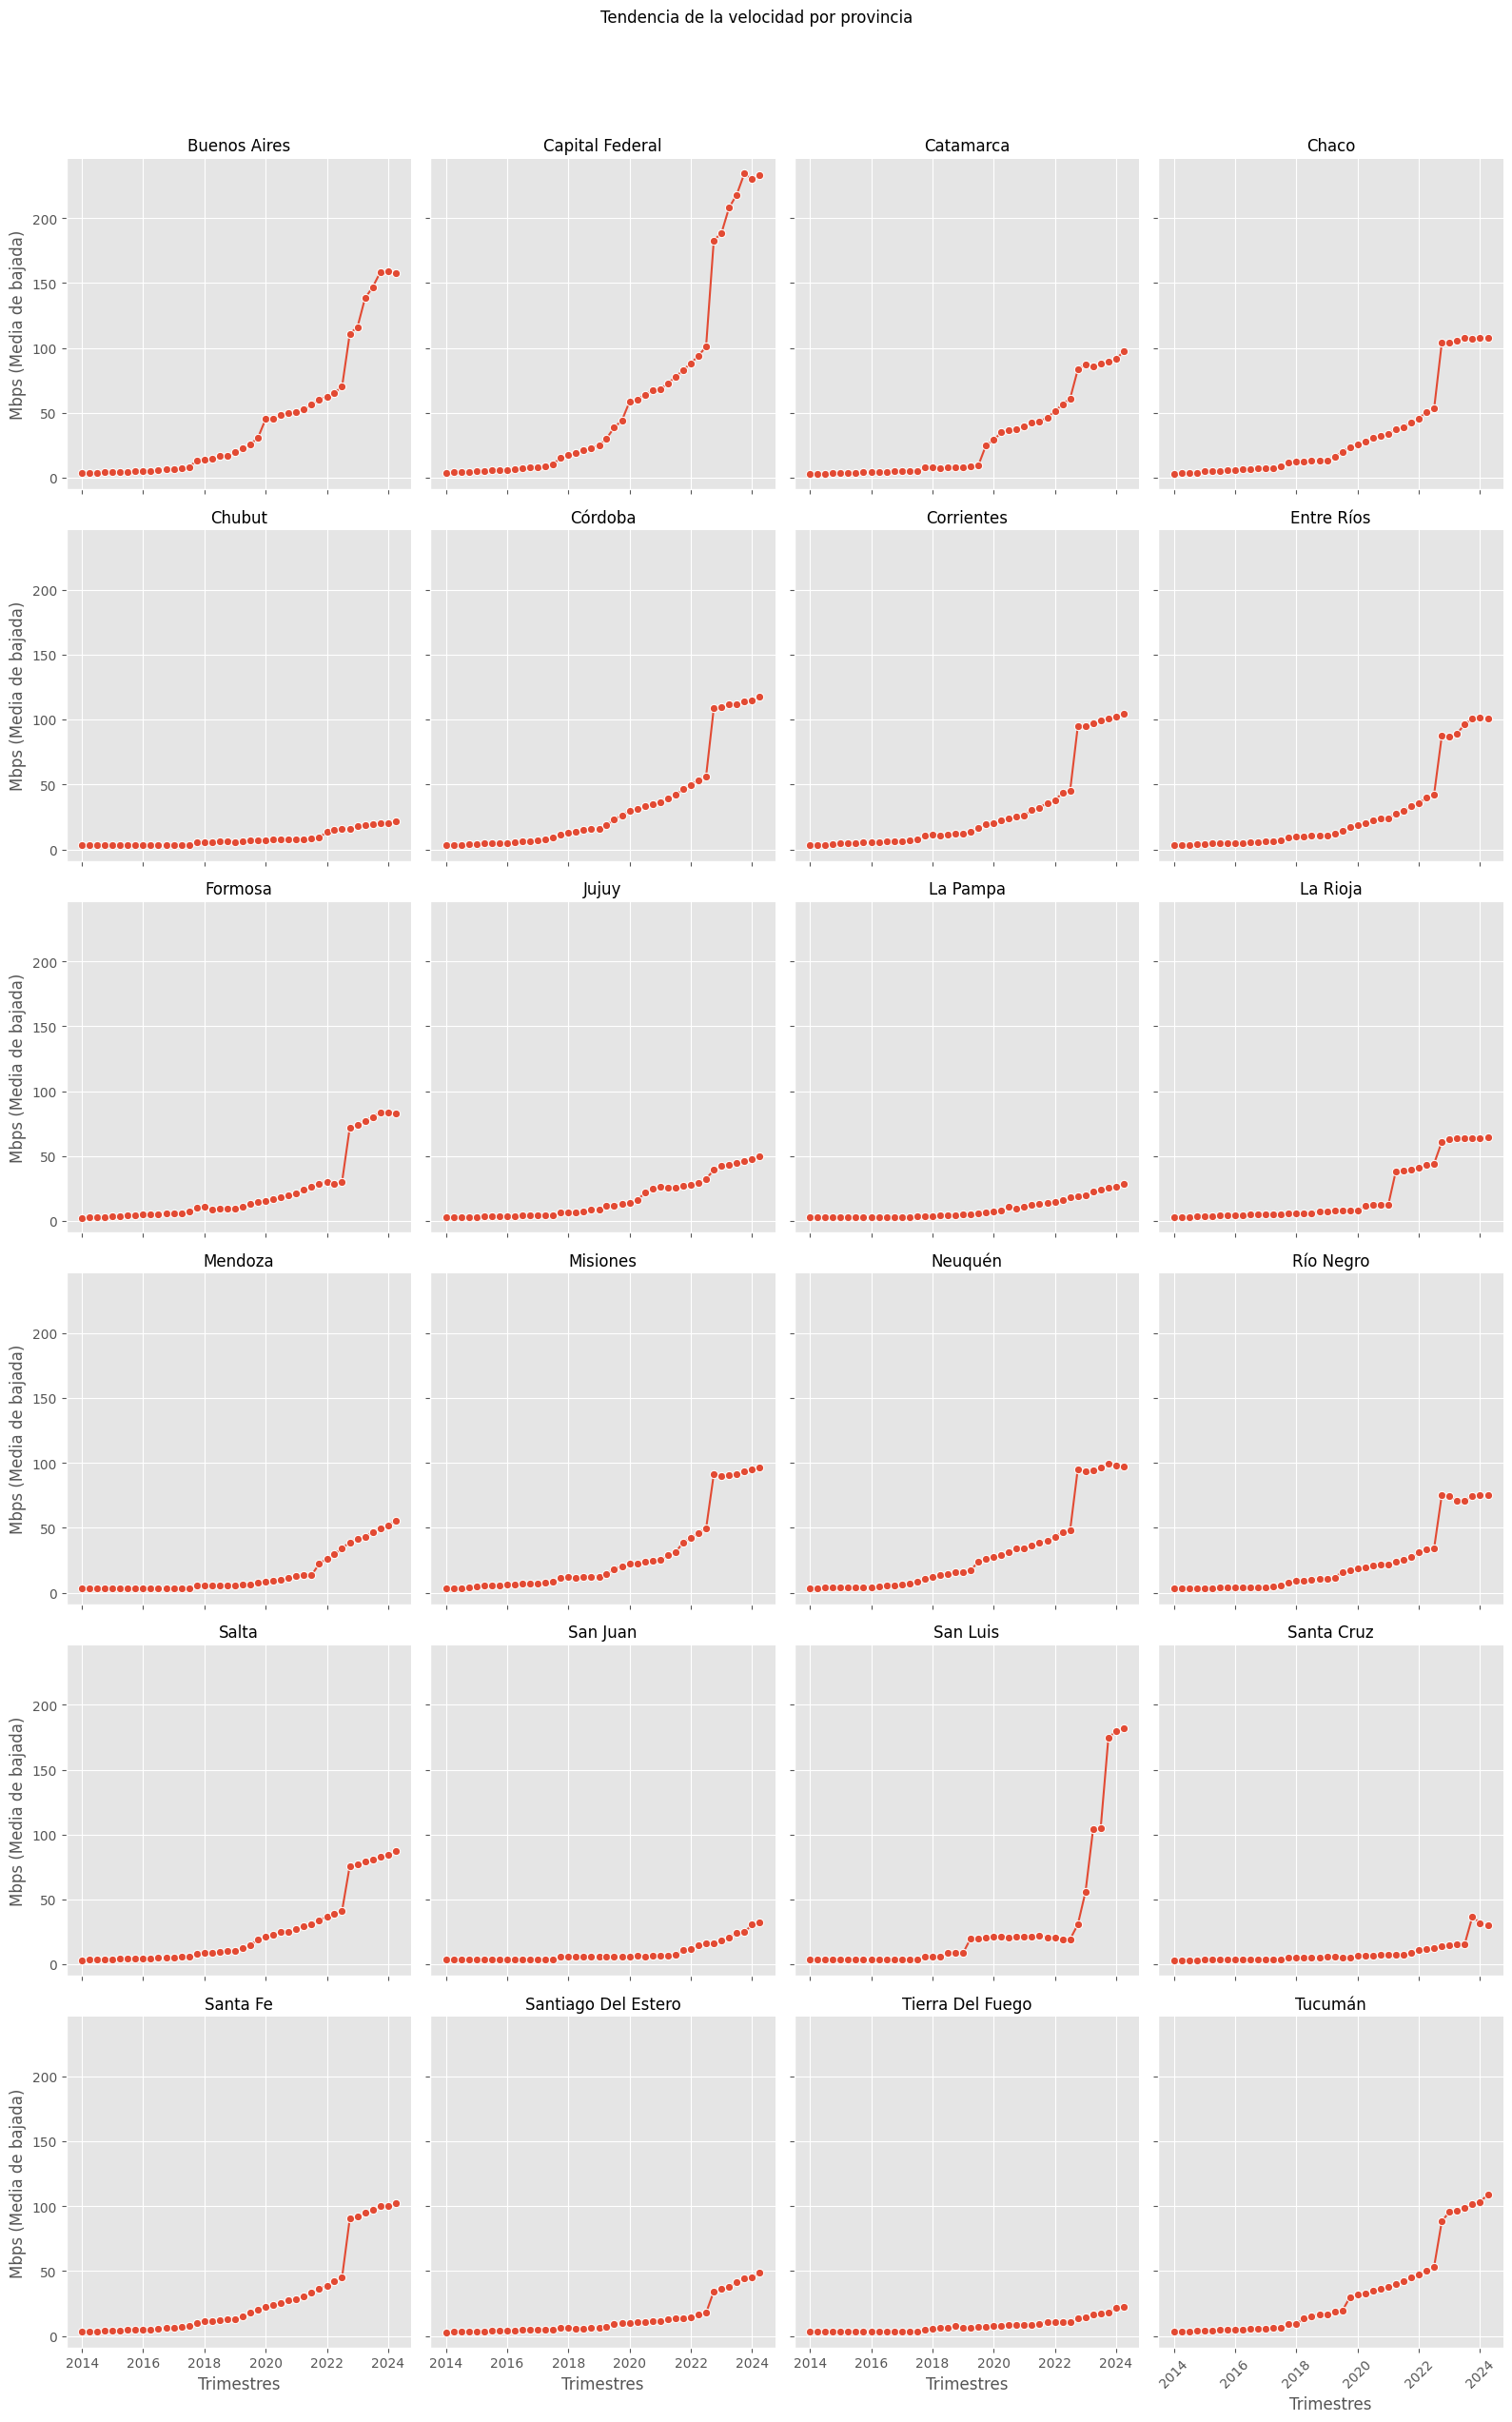

In [421]:
g = sns.FacetGrid(df_3, col='Provincia', col_wrap=4, height=4)
g.map(sns.lineplot, 'Fecha', 'Mbps (Media de bajada)', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Trimestres', 'Mbps (Media de bajada)')
g.fig.suptitle('Tendencia de la velocidad por provincia', y=1.05)
plt.xticks(rotation=45)
plt.show()

##### 1.5.3.2. Visualización diferenciada por provincias

In [422]:
import plotly.express as px

fig = px.line(df_3, x='Fecha', y='Mbps (Media de bajada)', color='Provincia', markers=True, 
              title='Tendencia de la velocidad por provincia')

# Personalizar el título 
fig.update_layout(title=
                  {'text': 'Tendencia de accesos cada 100 hogares por provincia', 
                    'font': { 
                        'size': 16, 'color': 'black', 
                        'family': 'Arial, sans-serif', 
                        'weight': 'bold' 
                    }, 
                    'x': 0.5, 
                    'xanchor': 'center' 
                    },
                  height=800
                  )

fig.update_xaxes(title_text='Trimestres')
fig.update_yaxes(title_text='Mbps (Media de bajada)')
fig.update_layout(legend_title_text='Provincia')
fig.show()

* **Observaciones**: 
* **Tendencia**: se observa que prácticamente todas las provincias han estado incrementando la velocidad en forma exponencial, con casos muy positivos como: 'Capital Federal', 'San Luis' y 'Buenos Aires'. Esto es importante a la hora de buscar un KPI. También se nota que a algunas provincias les está costando aumentar la velocidad, como 'Tierra del Fuego', 'Santa Cruz', 'Chubut' y 'La Pampa'. En la cuestión de velocidad parece que no existen un tope para aumentar porque todas las provincias están muy lejas del limite que ronda por los 10000 Mbps.   
* **Patrones**: se observa cierto patrón con la población en las repectivas provincias, y es más claro que con los accesos. Existen excepciones como San Luis, que aunque tengan poca población, su velocidad ha incrementado mucho en los últimos años.

##### 1.5.4. Análisis de tendencia en la hoja: 'Totales VMD'

In [423]:
df_4['Fecha'] = pd.to_datetime(df_2['Año'].astype(str) + 'Q' + df_2['Trimestre'].astype(str))

In [424]:
df_4.head()

Año  Trimestre  Mbps (Media de bajada)      Fecha
0  2024          2                  139.25 2024-04-01
1  2024          1                  139.15 2024-01-01
2  2023          4                  139.04 2023-10-01
3  2023          3                  129.67 2023-07-01
4  2023          2                  123.95 2023-04-01

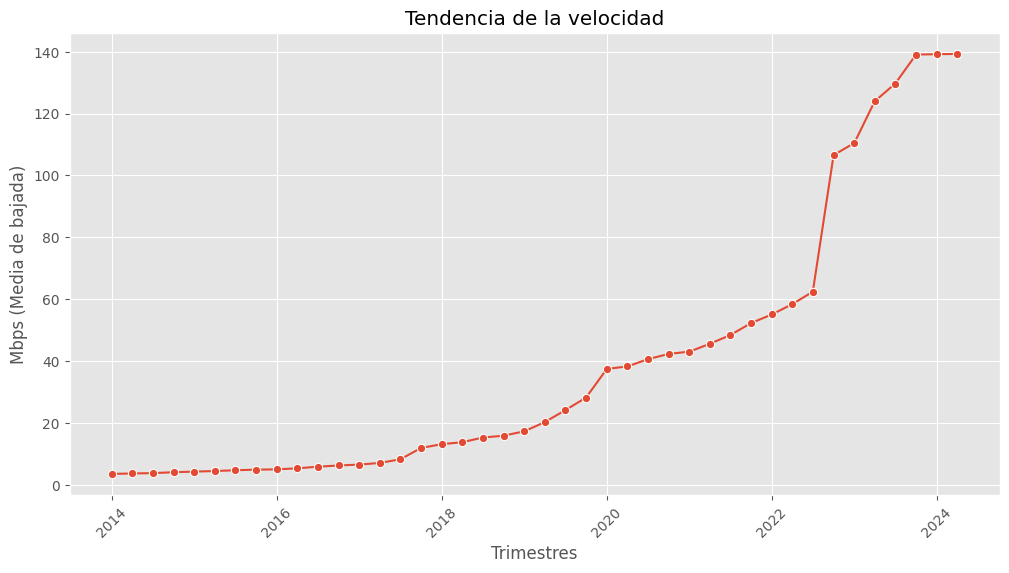

In [425]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_4, x='Fecha', y='Mbps (Media de bajada)', marker='o')
plt.title('Tendencia de la velocidad')
plt.xlabel('Trimestres')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

* **Observaciones**: *se observa que a nivel nacional, existe una tendencia alcista de forma exponencial, lo cual es muy positivo en miras hacia el futuro.

* **Observaciones**: se observa una tendencia claramente ascendente con ciertos valles pero ascendente en fin. En un análisis de regresión podria resolverse en que grado polinómico ajusta mejor. Pero para construir un KPI en este MVP, podría ser suficiente con exigir un poco más del crecimiento histórico.

##### 1.5.5. Análisis de tendencia en la hoja: 'Accesos Por Tecnología'

In [426]:
# Convertir las columnas 'Año' y 'Trimestre' a string y luego eliminar caracteres no numéricos
df_5['Año'] = df_5['Año'].astype(str).str.extract('(\d+)', expand=False).astype(int)
df_5['Trimestre'] = df_5['Trimestre'].astype(str).str.extract('(\d+)', expand=False).astype(int)

# Crear la columna 'Fecha' como un índice de periodos trimestrales y convertir a timestamp para obtener el formato 'YYYY-MM-DD'
df_5['Fecha'] = pd.PeriodIndex(year=df_5['Año'], quarter=df_5['Trimestre'], freq='Q').to_timestamp()

In [427]:
df_5

Año  Trimestre            Provincia      ADSL  Cablemodem  \
0     2024          2         Buenos Aires  214055.0   2722466.0   
1     2024          2      Capital Federal   54102.0   1144781.0   
2     2024          2            Catamarca    4951.0     10303.0   
3     2024          2                Chaco    9448.0     57935.0   
4     2024          2               Chubut   25955.0     80704.0   
...    ...        ...                  ...       ...         ...   
1002  2014          1           Santa Cruz   18927.0       100.0   
1003  2014          1             Santa Fe  322662.0    174296.0   
1004  2014          1  Santiago Del Estero   32567.0      3598.0   
1005  2014          1     Tierra Del Fuego   21618.0      2837.0   
1006  2014          1              Tucumán  129717.0        83.0   

      Fibra óptica  Wireless    Otros      Total      Fecha  
0        1849476.0  138638.0  64745.0  4989380.0 2024-04-01  
1         230402.0    4493.0  29821.0  1463599.0 2024-04-01  
2          58355.0    1384.0     81.0    75074.0 2024-04-01  
3          68944.0    8407.0   2358.0   147092.0 2024-04-01  
4          26516.0   31118.0   9930.0   174223.0 2024-04-01  
...            ...       ...      ...        ...        ...  
1002         381.0    4092.0   3264.0    26764.0 2014-01-01  
1003        3059.0    5951.0    644.0   506612.0 2014-01-01  
1004          19.0     915.0     34.0    37133.0 2014-01-01  
1005         648.0       1.0   2934.0    28038.0 2014-01-01  
1006         121.0      13.0     98.0   130032.0 2014-01-01  

[1007 rows x 10 columns]

##### 1.5.5.1. Visualización de accesos por tecnología diferenciada por provincias

In [428]:
# Transformar al formato largo
df_long = df_5.melt(id_vars=['Provincia', 'Fecha'], value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'],
                  var_name='Tecnología', value_name='Accesos')


In [429]:
df_long

Provincia      Fecha Tecnología   Accesos
0            Buenos Aires 2024-04-01       ADSL  214055.0
1         Capital Federal 2024-04-01       ADSL   54102.0
2               Catamarca 2024-04-01       ADSL    4951.0
3                   Chaco 2024-04-01       ADSL    9448.0
4                  Chubut 2024-04-01       ADSL   25955.0
...                   ...        ...        ...       ...
5030           Santa Cruz 2014-01-01      Otros    3264.0
5031             Santa Fe 2014-01-01      Otros     644.0
5032  Santiago Del Estero 2014-01-01      Otros      34.0
5033     Tierra Del Fuego 2014-01-01      Otros    2934.0
5034              Tucumán 2014-01-01      Otros      98.0

[5035 rows x 4 columns]

In [430]:
# Obtener la lista de provincias únicas
provincias = df_long['Provincia'].unique()

# Crear subplots con 2 gráficos por fila
rows = len(provincias) // 3 + (1 if len(provincias) % 3 else 0)
fig = make_subplots(rows=rows, cols=3, subplot_titles=provincias)

# Crear los gráficos
for idx, provincia in enumerate(provincias):
    # Filtrar los datos para la provincia actual
    df_provincia = df_long[df_long['Provincia'] == provincia]
    
    # Crear el gráfico interactivo
    for tecnologia in df_provincia['Tecnología'].unique():
        df_tec = df_provincia[df_provincia['Tecnología'] == tecnologia]
        fig.add_trace(
            go.Scatter(x=df_tec['Fecha'], y=df_tec['Accesos'], mode='lines+markers', name=tecnologia),
            row=(idx // 3) + 1, col=(idx % 3) + 1
        )

# Actualizar layout del gráfico
fig.update_layout(height=rows*400, width=1500, title_text="Tendencia de Accesos por Tecnología en las Provincias", showlegend=False)

# Crear dropdown de tecnologías
dropdown_buttons = [
    {'label': tecnologia, 'method': 'update',
     'args': [{'visible': [tecnologia in trace.name for trace in fig.data]},
              {'title': f"Tendencia de Accesos por {tecnologia} en las Provincias"}]}
    for tecnologia in df_long['Tecnología'].unique()
]

# Añadir el dropdown
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True
    }]
)

# Mostrar el gráfico
fig.show()

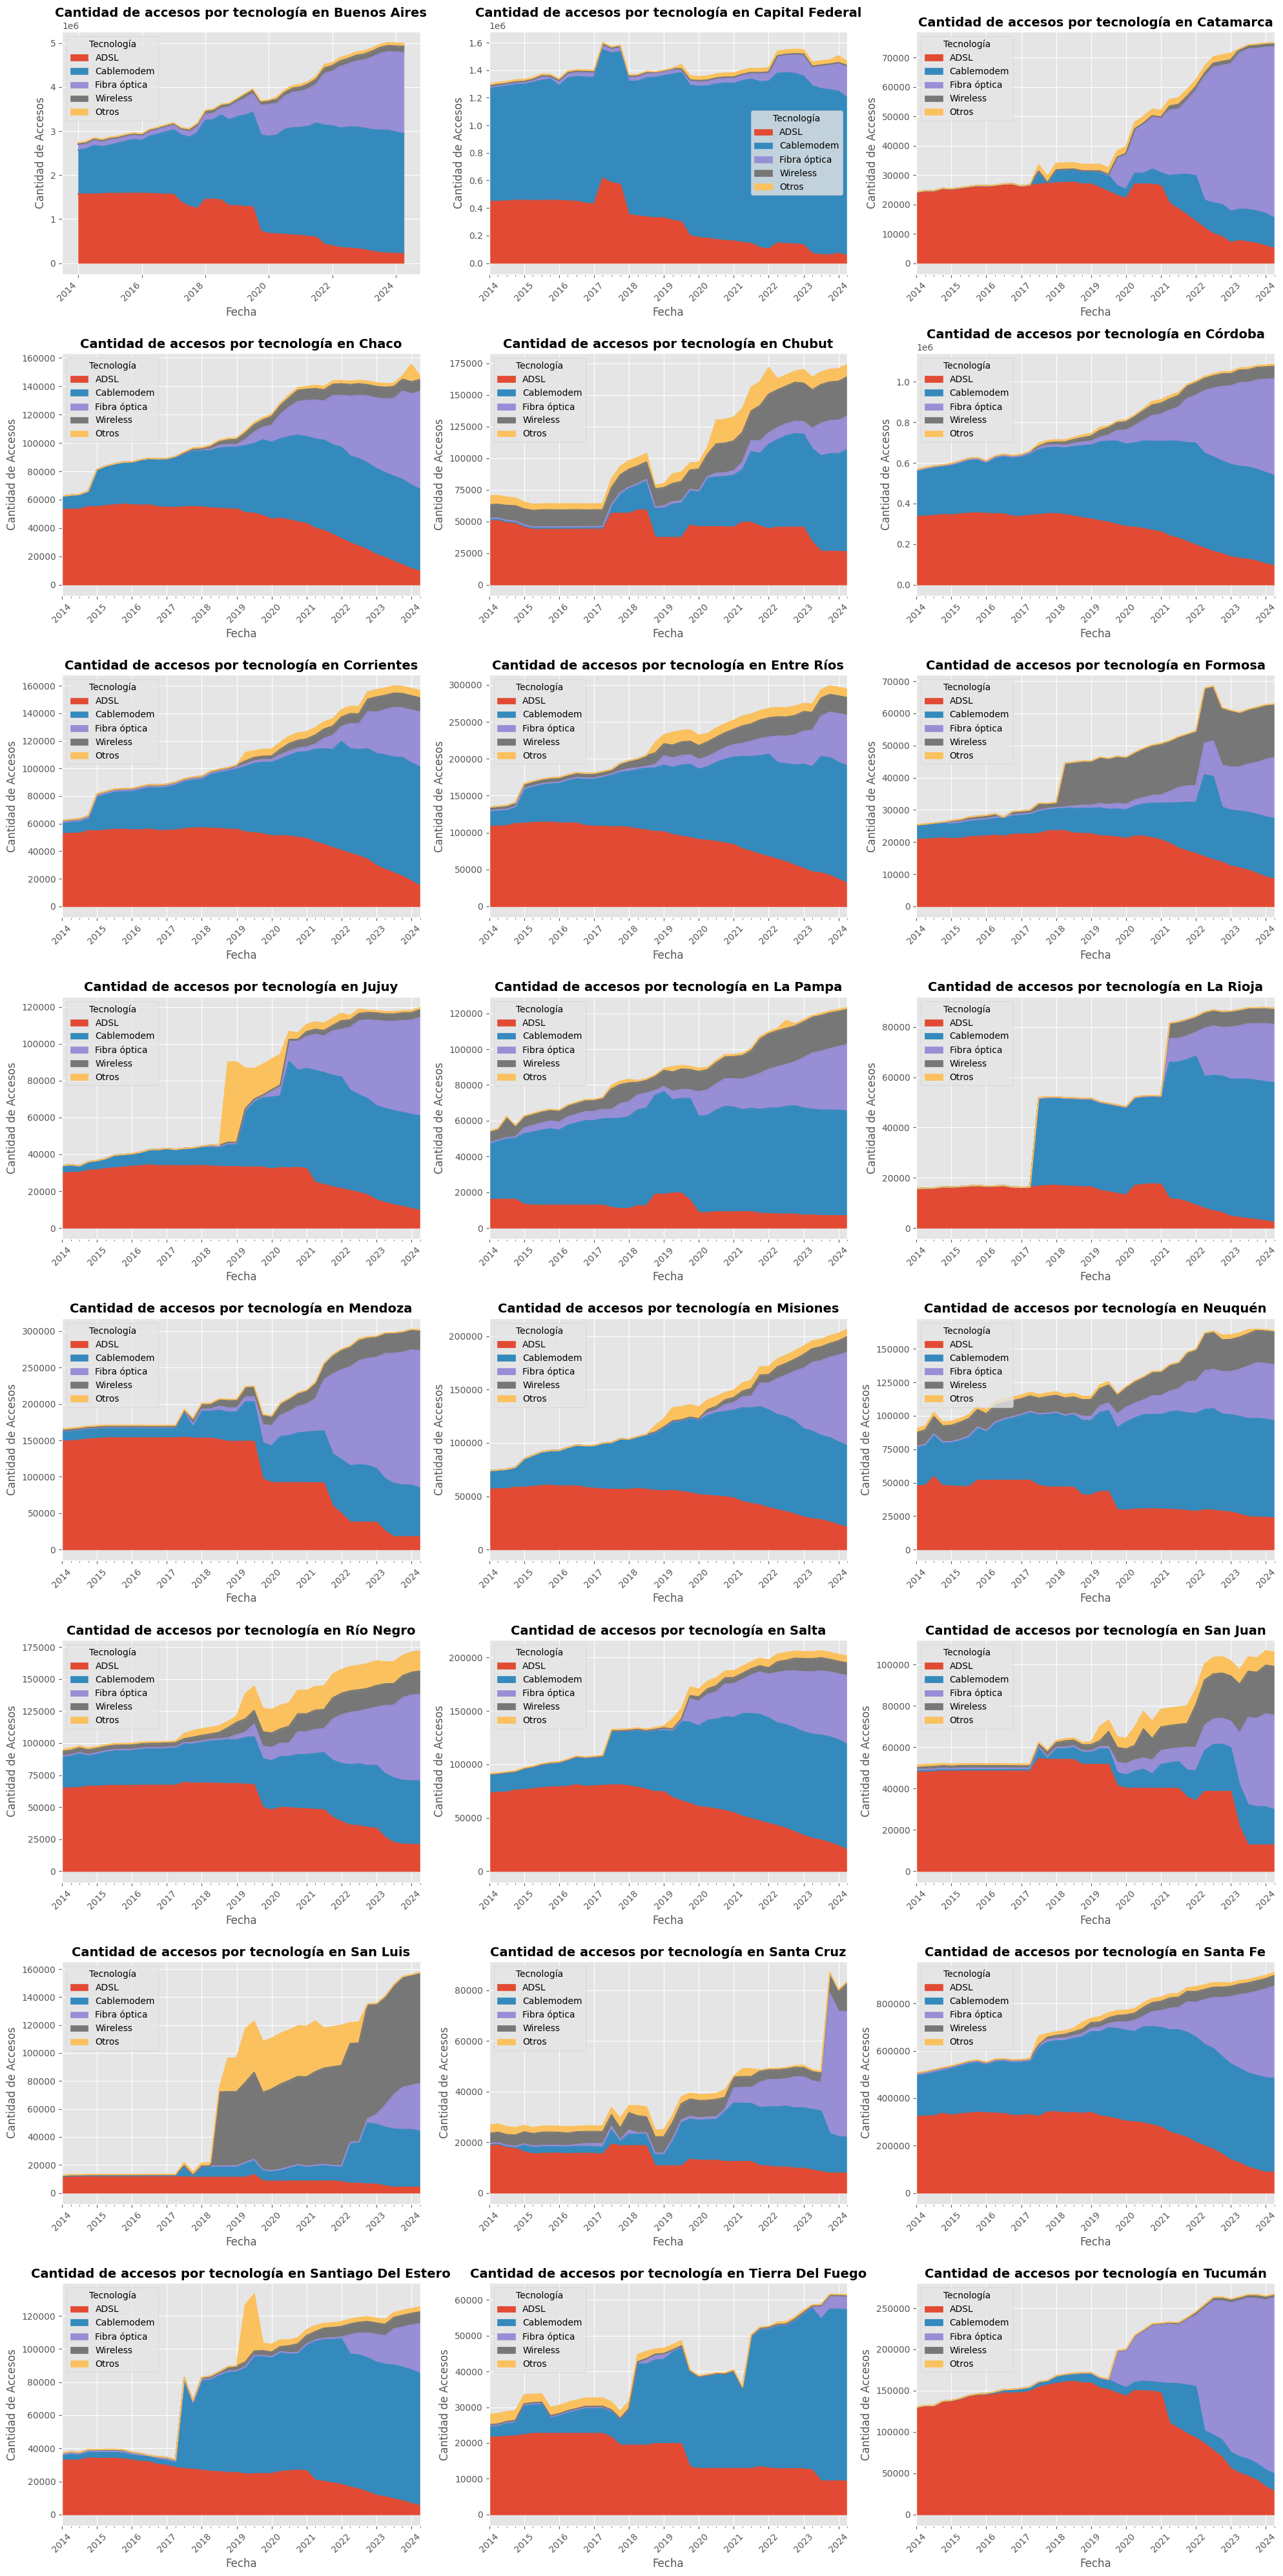

In [431]:
# Obtener la lista de provincias únicas
provincias = df_5['Provincia'].unique()

# Calcular el número de filas necesarias
num_filas = ceil(len(provincias) / 3)

# Crear una figura y ejes para los subplots
fig, axs = plt.subplots(num_filas, 3, figsize=(20, num_filas * 5))

# Asegurarse de que 'axs' es un arreglo 2D
axs = axs.reshape(-1, 3)

# Crear los gráficos
for idx, provincia in enumerate(provincias):
    # Filtrar los datos para la provincia actual
    df_5_provincia = df_5[df_5['Provincia'] == provincia]
    
    # Configurar el índice del DataFrame por la columna 'Fecha'
    df_5_provincia.set_index('Fecha', inplace=True)

    # Seleccionar las columnas deseadas sin 'Fecha' ya que ahora es el índice
    df_5_provincia = df_5_provincia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]

    # Determinar la posición del subplot
    fila = idx // 3
    col = idx % 3

    # Crear el gráfico de área apilada en el subplot correspondiente
    df_5_provincia.plot(kind='area', stacked=True, ax=axs[fila, col])

    # Añadir títulos y etiquetas
    axs[fila, col].set_title(f'Cantidad de accesos por tecnología en {provincia}', fontsize=14, fontweight='bold')
    axs[fila, col].set_xlabel('Fecha', fontsize=12)
    axs[fila, col].set_ylabel('Cantidad de Accesos', fontsize=12)
    axs[fila, col].legend(title='Tecnología')
    axs[fila, col].tick_params(axis='x', rotation=45)

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()


* **Observaciones**: *se observa lo que se venia comentando. Que el foco del desarrollo radica en la instalación fibra óptica, y es en esto, que debe seguir el esmero, a la vez que cada provincia se debe ir deshaciendo del ADSL. A pesar de ello, algunas provincias aun no tienen fibra óptica, como: 'Tierra del Fuego', 'Chubut' y 'Capital Federal'. En las provincias de Santiago de Estero, Jujuy y San Luis se observa que por cierto tiempo en el 2019/2020 existio un pico en la cantidad de accesos en 'Otros'.*

##### 1.5.6. Análisis de tendencia en la hoja: 'Totales Accesos Por Tecnología'

In [432]:
df_6.head(1)

Año  Trimestre    ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2024          2  733491     5867504       4169958    593197  191957   

      Total  
0  11556107

In [433]:
# Convertir las columnas 'Año' y 'Trimestre' a string y luego eliminar caracteres no numéricos
df_6['Año'] = df_6['Año'].astype(str).str.extract('(\d+)', expand=False).astype(int)
df_6['Trimestre'] = df_6['Trimestre'].astype(str).str.extract('(\d+)', expand=False).astype(int)

# Crear la columna 'Fecha' como un índice de periodos trimestrales y convertir a timestamp para obtener el formato 'YYYY-MM-DD'
df_6['Fecha'] = pd.PeriodIndex(year=df_6['Año'], quarter=df_6['Trimestre'], freq='Q').to_timestamp()

df_6

Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0   2024          2   733491     5867504       4169958    593197  191957   
1   2024          1   774475     5986957       4015101    598682  257941   
2   2023          4   836390     6022532       3908183    585760  194796   
3   2023          3   897895     6018832       3708718    581436  200027   
4   2023          2  1006509     5997149       3463988    581823  202428   
5   2023          1  1204417     6002582       3243411    576647  214838   
6   2022          4  1315373     6037457       3060575    572969  221740   
7   2022          3  1395277     6031970       2871541    557110  235230   
8   2022          2  1468333     5979214       2723285    556243  231609   
9   2022          1  1533240     6073426       2219533    545814  251996   
10  2021          4  1657615     5984240       2072236    523107  252596   
11  2021          3  1950631     5826257       1566048    492415  250190   
12  2021          2  2018587     5641731       1472246    476968  253552   
13  2021          1  2175211     5424782       1362976    434548  250455   
14  2020          4  2213949     5371824       1311199    421554  253036   
15  2020          3  2263889     5259351       1170879    413259  248821   
16  2020          2  2295533     5005115       1106725    376667  247016   
17  2020          1  2299457     4903674       1047817    352333  209145   
18  2019          4  2414575     4883869        941295    340144  213298   
19  2019          3  2909805     4800091        852221    338241  264326   
20  2019          2  2990457     4635575        760794    308027  265328   
21  2019          1  3132789     4435439        637099    276419  166389   
22  2018          4  3329027     4313831        388013    264299  178485   
23  2018          3  3521447     4238171        247366    246181   93870   
24  2018          2  3557216     4038141        226285    194267   94535   
25  2018          1  3574294     3981129        217460    165300   98870   
26  2017          4  3584311     3818157        211425    155775  100554   
27  2017          3  3622575     3670221        193964    106443  131740   
28  2017          2  3723518     3383434        180777     85813   56122   
29  2017          1  3708898     3276251        180146     84813   55746   
30  2016          4  3722794     3210602        178070     85119   55088   
31  2016          3  3776442     3124855        169898     81455   54300   
32  2016          2  3782085     3035272        167788     85452   59482   
33  2016          1  3792493     2806359        164371     85370   58763   
34  2015          4  3803024     2898226        139187     85726   58668   
35  2015          3  3788696     2840203        162663     84530   58976   
36  2015          2  3767821     2756294        150839     82077   59157   
37  2015          1  3756153     2668248        168188     79098   66045   
38  2014          4  3764038     2536219        149682     76984   71573   
39  2014          3  3714764     2569868        155494     85096   70049   
40  2014          2  3708882     2461670        149363     72405   72148   
41  2014          1  3697066     2407330        150323     70749   72930   

       Total      Fecha  
0   11556107 2024-04-01  
1   11633156 2024-01-01  
2   11547661 2023-10-01  
3   11406908 2023-07-01  
4   11251897 2023-04-01  
5   11241895 2023-01-01  
6   11208114 2022-10-01  
7   11091128 2022-07-01  
8   10958684 2022-04-01  
9   10624009 2022-01-01  
10  10489794 2021-10-01  
11  10085541 2021-07-01  
12   9863084 2021-04-01  
13   9647972 2021-01-01  
14   9571562 2020-10-01  
15   9356199 2020-07-01  
16   9031056 2020-04-01  
17   8812426 2020-01-01  
18   8793181 2019-10-01  
19   9164684 2019-07-01  
20   8960181 2019-04-01  
21   8648135 2019-01-01  
22   8473655 2018-10-01  
23   8347035 2018-07-01  
24   8110444 2018-04-01  
25   8037053 2018-01-01  
26   7870222 2017-10-01  
27   772

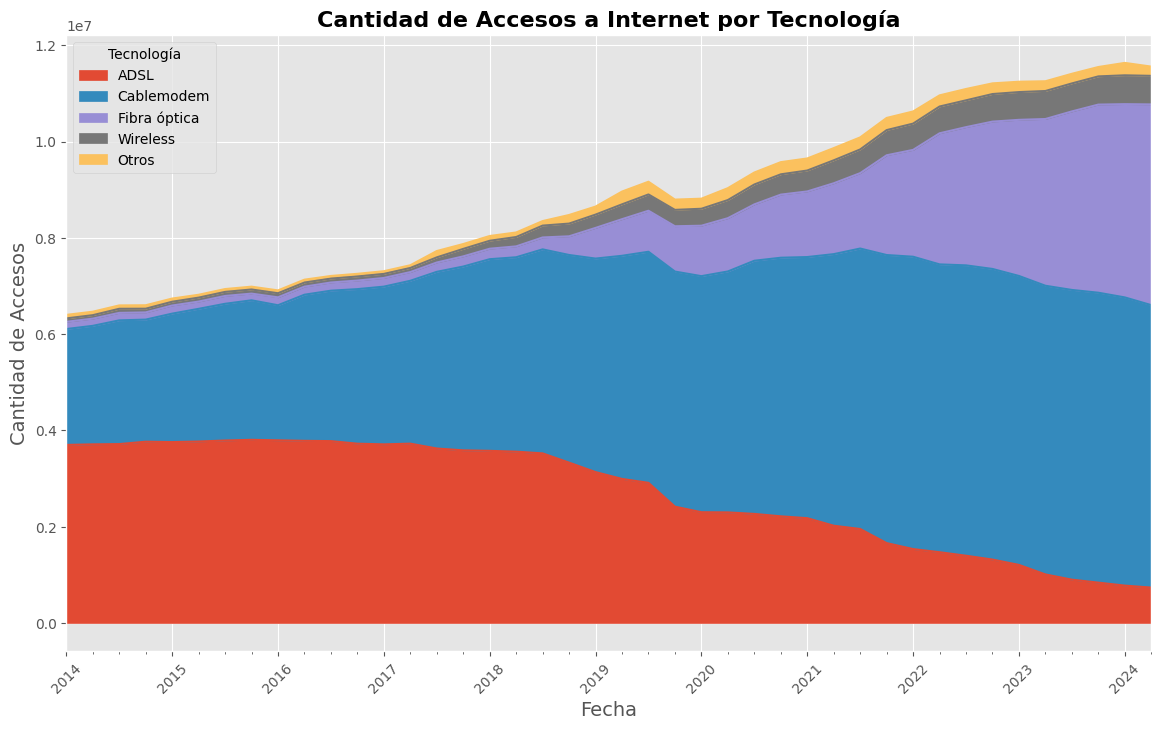

In [434]:
# Convertir las columnas 'Año' y 'Trimestre' a string y luego eliminar caracteres no numéricos
df_6['Año'] = df_6['Año'].astype(str).str.extract('(\d+)', expand=False).astype(int)
df_6['Trimestre'] = df_6['Trimestre'].astype(str).str.extract('(\d+)', expand=False).astype(int)

# Crear la columna 'Fecha' como un índice de periodos trimestrales y convertir a timestamp para obtener el formato 'YYYY-MM-DD'
df_6['Fecha'] = pd.PeriodIndex(year=df_6['Año'], quarter=df_6['Trimestre'], freq='Q').to_timestamp()

# Configurar el índice del DataFrame por la columna 'Fecha'
df_6.set_index('Fecha', inplace=True)

# Seleccionar las columnas deseadas sin 'Fecha' ya que ahora es el índice
df_6b = df_6[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]

# Crear el gráfico de área apilada
df_6b.plot(kind='area', stacked=True, figsize=(14, 8))

# Añadir títulos y etiquetas
plt.title('Cantidad de Accesos a Internet por Tecnología', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de Accesos', fontsize=14)
plt.legend(title='Tecnología')
plt.xticks(rotation=45)
plt.show()


* **Observaciones**: *se observa que a nivel nacional, promediando todas las provincias, existe un gran aumento en la tecnologia de fibra óptica, y el ADSL se acerca al deshuso.*

##### 1.5.7. Análisis de tendencia en la hoja: 'Dial-BAf'

* **Observaciones**: *se intentó realizar la visualización por medio del gráfico de barras comparativo y por medio del gráfico de área, filtrando por provincias o por tecnología pero ninguno dio buen resultado. Esto sucedió porque Dial Up es muy pequeño frente a Banda Ancha Fija. 

In [435]:
# Transformar al formato largo para incluir una columna 'Tecnología'
df_long_7 = df_7.melt(id_vars=['Fecha', 'Provincia'], value_vars=['Dial up', 'Banda ancha fija'],
                  var_name='Tecnología', value_name='Accesos')

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Fecha']"

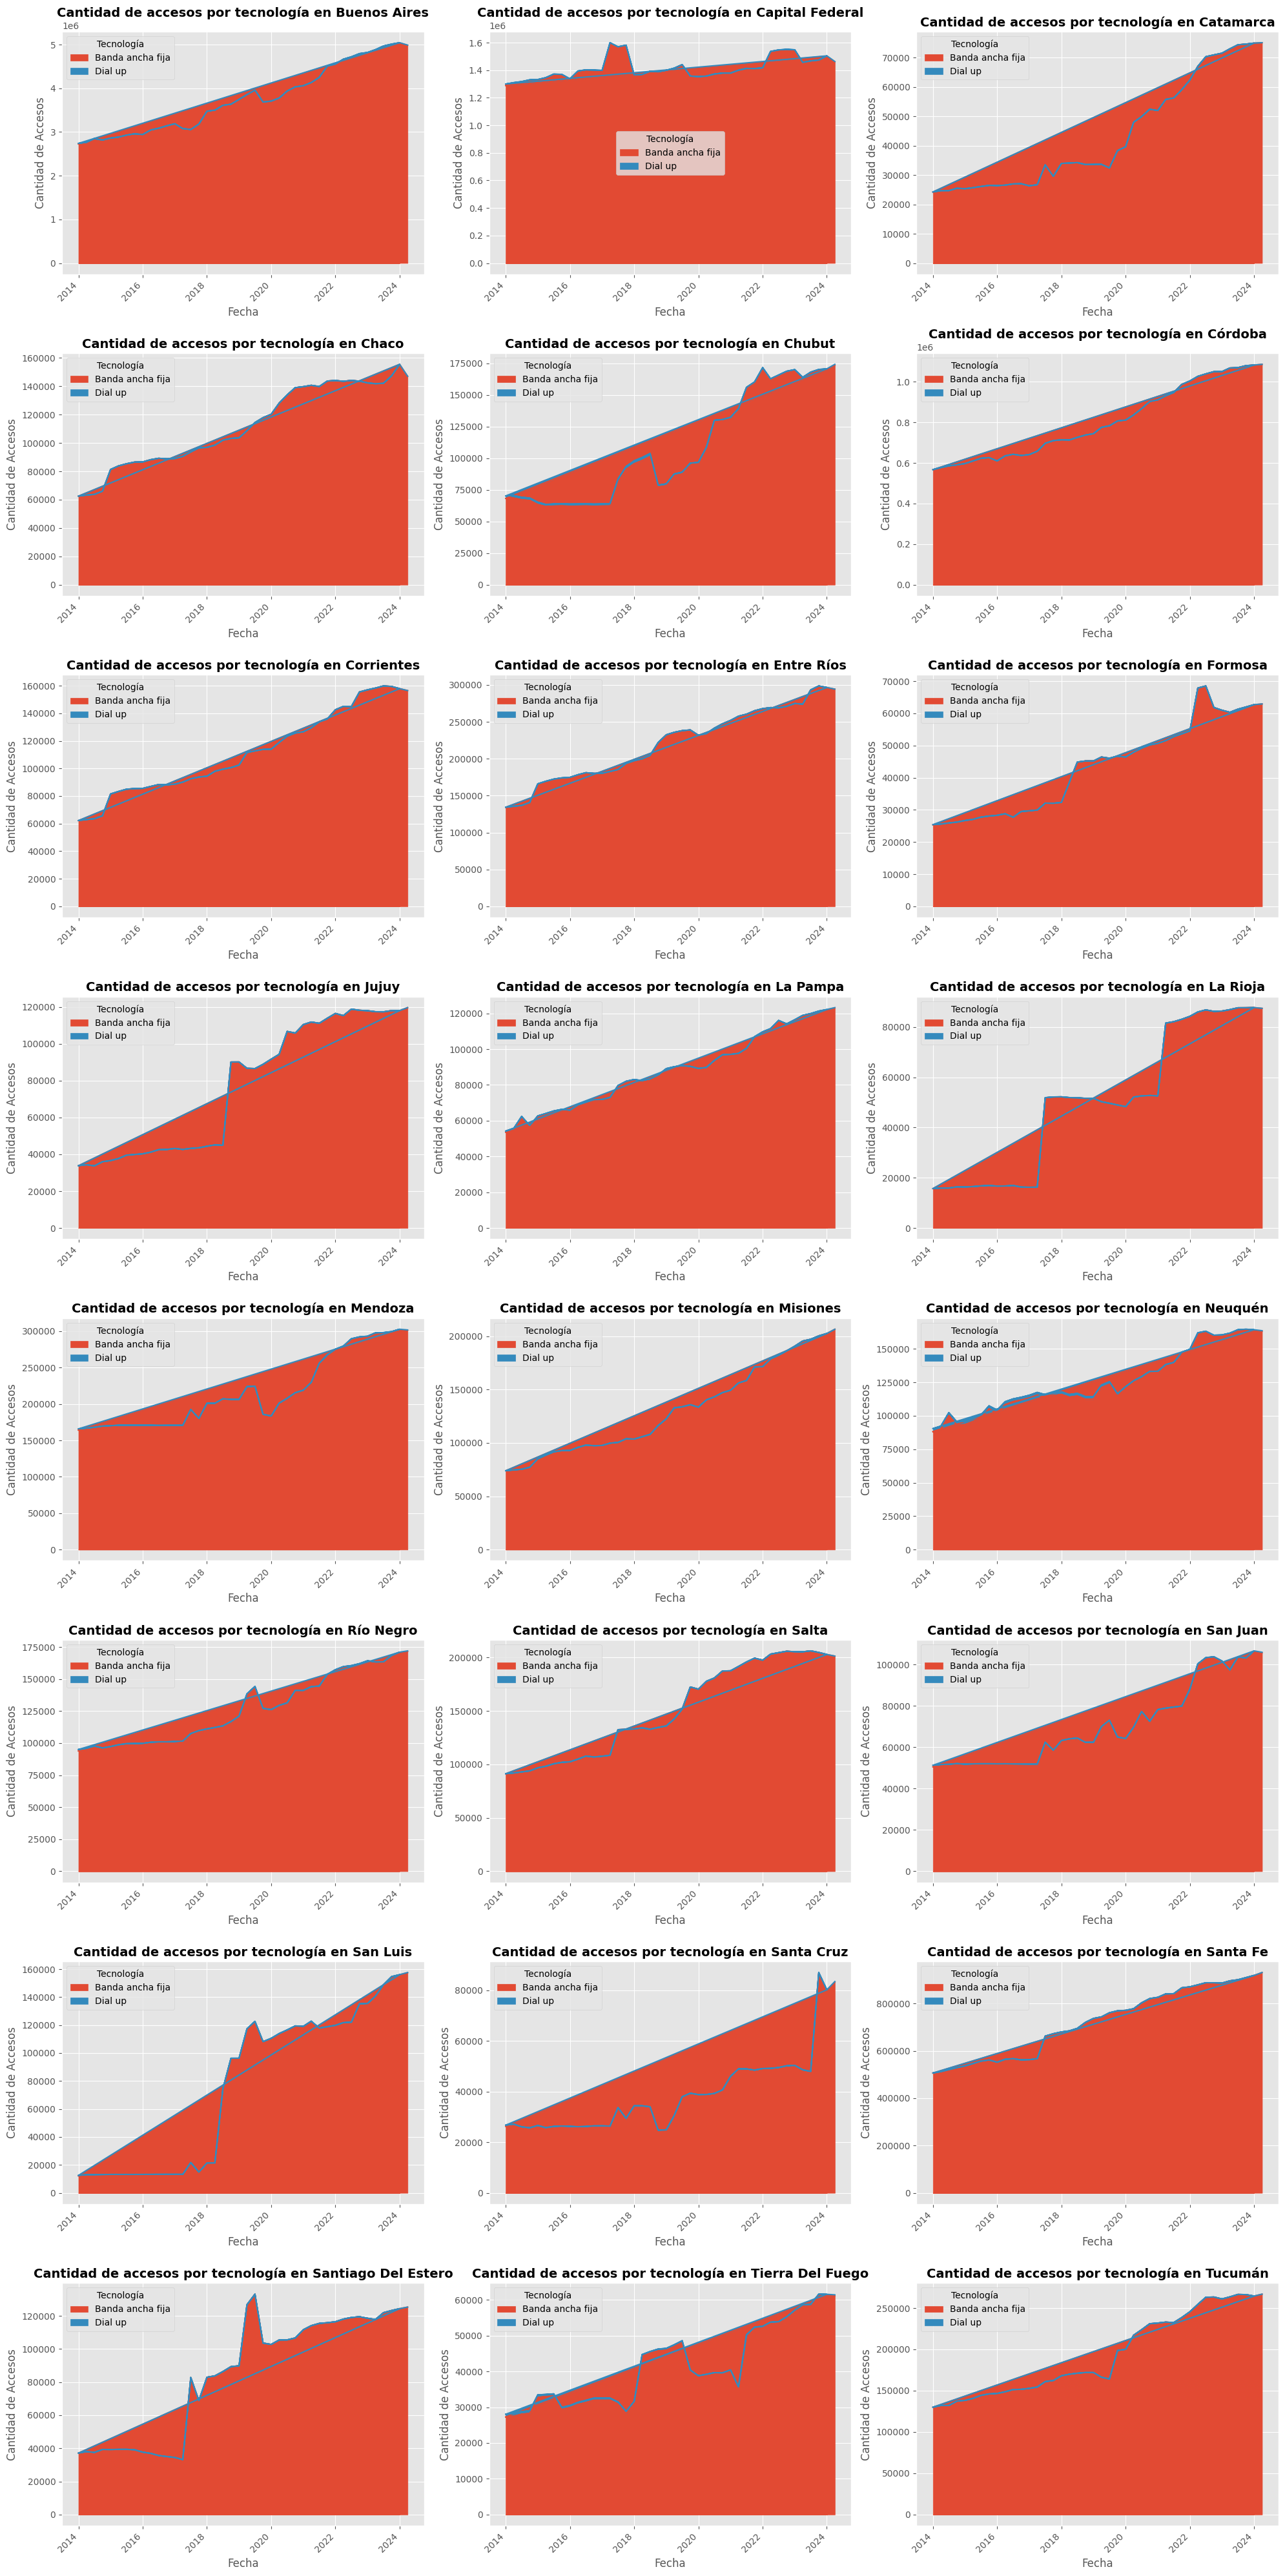

In [ ]:
# Convertir las columnas 'Año' y 'Trimestre' a string y luego eliminar caracteres no numéricos
df_7['Año'] = df_7['Año'].astype(str).str.extract('(\d+)', expand=False).astype(int)
df_7['Trimestre'] = df_7['Trimestre'].astype(str).str.extract('(\d+)', expand=False).astype(int)

# Crear la columna 'Fecha' como un índice de periodos trimestrales y convertir a timestamp para obtener el formato 'YYYY-MM-DD'
df_7['Fecha'] = pd.PeriodIndex(year=df_7['Año'], quarter=df_7['Trimestre'], freq='Q').to_timestamp()

# Obtener la lista de provincias únicas
provincias = df_7['Provincia'].unique()

# Calcular el número de filas necesarias
num_filas = ceil(len(provincias) / 3)

# Crear una figura y ejes para los subplots
fig, axs = plt.subplots(num_filas, 3, figsize=(20, num_filas * 5))

# Asegurarse de que 'axs' es un arreglo 2D
axs = axs.reshape(-1, 3)

# Crear los gráficos
for idx, provincia in enumerate(provincias):
    # Filtrar los datos para la provincia actual
    df_7_provincia = df_7[df_7['Provincia'] == provincia]
    
    # Configurar el índice del DataFrame por la columna 'Fecha'
    df_7_provincia.set_index('Fecha', inplace=True)

    # Seleccionar las columnas deseadas sin 'Fecha' ya que ahora es el índice
    df_7_provincia = df_7_provincia[['Banda ancha fija', 'Dial up']]

    # Determinar la posición del subplot
    fila = idx // 3
    col = idx % 3

    # Crear el gráfico de área apilada en el subplot correspondiente
    df_7_provincia.plot(kind='area', stacked=True, ax=axs[fila, col])

    # Añadir títulos y etiquetas
    axs[fila, col].set_title(f'Cantidad de accesos por tecnología en {provincia}', fontsize=14, fontweight='bold')
    axs[fila, col].set_xlabel('Fecha', fontsize=12)
    axs[fila, col].set_ylabel('Cantidad de Accesos', fontsize=12)
    axs[fila, col].legend(title='Tecnología')
    axs[fila, col].tick_params(axis='x', rotation=45)

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

##### 1.5.8. Análisis de tendencia en la hoja: 'Totales Dial-BAf'

**Observaciones**: *se resolverá haciendo un filtro por tecnología para visualizar mejor los datos de Dial Up.*

In [ ]:
df_8.head(1)

Año  Trimestre  Banda ancha fija  Dial up     Total
0  2024          2          11544314    11793  11556107

In [ ]:
# Convertir las columnas 'Año' y 'Trimestre' a string y luego eliminar caracteres no numéricos
df_8['Año'] = df_8['Año'].astype(str).str.extract('(\d+)', expand=False).astype(int)
df_8['Trimestre'] = df_8['Trimestre'].astype(str).str.extract('(\d+)', expand=False).astype(int)

# Crear la columna 'Fecha' como un índice de periodos trimestrales y convertir a timestamp para obtener el formato 'YYYY-MM-DD'
df_8['Fecha'] = pd.PeriodIndex(year=df_8['Año'], quarter=df_8['Trimestre'], freq='Q').to_timestamp()

In [ ]:
df_8.head(1)

Año  Trimestre  Banda ancha fija  Dial up     Total      Fecha
0  2024          2          11544314    11793  11556107 2024-04-01

In [ ]:
# Transformar al formato largo para incluir una columna 'Tecnología'
df_long_8 = df_8.melt(id_vars=['Fecha'], value_vars=['Dial up', 'Banda ancha fija'],
                  var_name='Tecnología', value_name='Accesos')

# Crear el gráfico de barras
fig = px.bar(df_long_8, x='Fecha', y='Accesos', color='Tecnología', barmode='group',
             title='Comparación de Accesos entre Dial Up y Banda Ancha Fija (2014-2024)')

# Configurar botones para filtrar por tecnología
tecnologias = df_long_8['Tecnología'].unique()
botones = []

for tecnologia in tecnologias:
    botones.append(dict(
        args=[{"visible": [trace.name == tecnologia for trace in fig.data]},
              {"title": f"Accesos por Tecnología: {tecnologia}"}],
        label=tecnologia,
        method="update"
    ))

# Añadir un botón para mostrar ambas tecnologías
botones.append(dict(
    args=[{"visible": [True, True]},
          {"title": "Accesos por Tecnología: Todas"}],
    label="Todas",
    method="update"
))

# Añadir los botones al layout
fig.update_layout(
    updatemenus=[{
        "buttons": botones,
        "direction": "down",
        "showactive": True
    }]
)

# Mostrar el gráfico
fig.show()


##### 1.5.9. Análisis de tendencia en la hoja: 'Ingresos'

**Consideraciones**: 
* Para realizar un análisis de tendencia de ingresos por ventas es necesario ajustar por inflación. Considero que existe dos métodos:
  * Cambiar la moneda a dólares, para luego calcular la rentabilidad en dólares (presenta el problema de que existe también inflación en dólares).
  * Hacer una división por la inflación acumulada durante el período. De esta forma se ajusta en términos reales, como si no hubieses tenido inflación.
* Se opta por descontar en base a la inflación acumulada. 

In [ ]:
df_9.head(1)

Año  Trimestre  Ingresos (miles de pesos)       Periodo
0  2024          2               4.420322e+08  Abr-Jun 2024

In [ ]:
# Crear un ID para concatenar ambas tablas
df_9['ID'] = df_9.index + 1
df_9.head(4)

Año  Trimestre  Ingresos (miles de pesos)        Periodo  ID
0  2024          2               4.420322e+08   Abr-Jun 2024   1
1  2024          1               3.461990e+08   Ene-Mar 2024   2
2  2023          4               1.673760e+08   Oct-Dic 2023   3
3  2023          3               1.331066e+08  Jul-Sept 2023   4

In [ ]:
# Convertir las columnas 'Año' y 'Trimestre' a string y luego eliminar caracteres no numéricos
df_9['Año'] = df_9['Año'].astype(str).str.extract('(\d+)', expand=False).astype(int)
df_9['Trimestre'] = df_9['Trimestre'].astype(str).str.extract('(\d+)', expand=False).astype(int)

# Crear la columna 'Fecha' como un índice de periodos trimestrales y convertir a timestamp para obtener el formato 'YYYY-MM-DD'
df_9['Fecha'] = pd.PeriodIndex(year=df_9['Año'], quarter=df_9['Trimestre'], freq='Q').to_timestamp()

In [ ]:
df_9 = df_9.sort_values(by='Fecha', ascending=True)

In [ ]:
df_9

Año  Trimestre  Ingresos (miles de pesos)        Periodo  ID      Fecha
41  2014          1               2.984054e+06   Ene-Mar 2014  42 2014-01-01
40  2014          2               3.270816e+06   Abr-Jun 2014  41 2014-04-01
39  2014          3               3.478638e+06  Jul-Sept 2014  40 2014-07-01
38  2014          4               3.950441e+06   Oct-Dic 2014  39 2014-10-01
37  2015          1               4.876385e+06   Ene-Mar 2015  38 2015-01-01
36  2015          2               4.701791e+06   Abr-Jun 2015  37 2015-04-01
35  2015          3               5.153739e+06  Jul-Sept 2015  36 2015-07-01
34  2015          4               5.376899e+06   Oct-Dic 2015  35 2015-10-01
33  2016          1               5.936845e+06   Ene-Mar 2016  34 2016-01-01
32  2016          2               6.534241e+06   Abr-Jun 2016  33 2016-04-01
31  2016          3               6.912442e+06  Jul-Sept 2016  32 2016-07-01
30  2016          4               7.483980e+06   Oct-Dic 2016  31 2016-10-01
29  2017          1               8.701201e+06   Ene-Mar 2017  30 2017-01-01
28  2017          2               9.678647e+06   Abr-Jun 2017  29 2017-04-01
27  2017          3               1.006600e+07  Jul-Sept 2017  28 2017-07-01
26  2017          4               1.122613e+07   Oct-Dic 2017  27 2017-10-01
25  2018          1               1.317146e+07   Ene-Mar 2018  26 2018-01-01
24  2018          2               1.431947e+07   Abr-Jun 2018  25 2018-04-01
23  2018          3               1.541098e+07  Jul-Sept 2018  24 2018-07-01
22  2018          4               1.663769e+07   Oct-Dic 2018  23 2018-10-01
21  2019          1               2.020741e+07   Ene-Mar 2019  22 2019-01-01
20  2019          2               2.074312e+07   Abr-Jun 2019  21 2019-04-01
19  2019          3               2.165275e+07  Jul-Sept 2019  20 2019-07-01
18  2019          4               2.416925e+07   Oct-Dic 2019  19 2019-10-01
17  2020          1               2.994622e+07   Ene-Mar 2020  18 2020-01-01
16  2020          2               3.210248e+07   Abr-Jun 2020  17 2020-04-01
15  2020          3               3.199744e+07  Jul-Sept 2020  16 2020-07-01
14  2020          4               3.353970e+07   Oct-Dic 2020  15 2020-10-01
13  2021          1               3.667637e+07   Ene-Mar 2021  14 2021-01-01
12  2021          2               3.823967e+07   Abr-Jun 2021  13 2021-04-01
11  2021          3               4.299994e+07  Jul-Sept 2021  12 2021-07-01
10  2021          4               4.546789e+07   Oct-Dic 2021  11 2021-10-01
9   2022          1               5.521931e+07   Ene-Mar 2022  10 2022-01-01
8   2022          2               6.041950e+07   Abr-Jun 2022   9 2022-04-01
7   2022          3               6.408678e+07  Jul-Sept 2022   8 2022-07-01
6   2022          4               7.244348e+07   Oct-Dic 2022   7 2022-10-01
4   2023          2               1.180603e+08   Jun-Mar 2023   5 2023-04-01
3   2023          3               1.331066e+08  Jul-Sept 2023   4 2023-07-01
2   2023          4               1.673760e+08   Oct-Dic 2023   3 2023-10-01
1   2024          1               3.461990e+08   Ene-Mar 2024   2 2024-01-01
0   2024          2               4.420322e+08   Abr-Jun 2024   1 2024-04-01
5   2033          1               1.041350e+08   Ene-Mar 2023   6 2033-01-01

In [ ]:
# Por alguna razón que desconozco, se genera una fila extraña despúes del 2024-04-01. Por tal motivo se van a filtrar
df_9 = df_9[df_9['Fecha'] <= '2024-04-01']

In [ ]:
# Crear un ID para concatenar ambas tablas
df_9b['ID'] = df_9b.index
df_9b.head(4)

Año  Trimestre  Nivel general  ID
0  2024          2            4.6   0
1  2024          2            4.2   1
2  2024          2            8.8   2
3  2024          1           11.0   3

In [ ]:
# Convertir las columnas 'Año' y 'Trimestre' a string y luego eliminar caracteres no numéricos
df_9b['Año'] = df_9b['Año'].astype(str).str.extract('(\d+)', expand=False).astype(int)
df_9b['Trimestre'] = df_9b['Trimestre'].astype(str).str.extract('(\d+)', expand=False).astype(int)

# Crear la columna 'Fecha' como un índice de periodos trimestrales y convertir a timestamp para obtener el formato 'YYYY-MM-DD'
df_9b['Fecha'] = pd.PeriodIndex(year=df_9b['Año'], quarter=df_9b['Trimestre'], freq='Q').to_timestamp()

In [ ]:
df_9b = df_9b.sort_values(by='ID', ascending=False)

In [ ]:
df_9b['Inflacion'] = df_9b['Nivel general'] / 100
df_9b['Inflacion_x'] = df_9b['Inflacion'] + 1

In [ ]:
df_9b['Inflacion_Trimestral'] = df_9b.groupby(['Año', 'Trimestre'])['Inflacion_x'].cumprod()
df_9b

Año  Trimestre  Nivel general  ID      Fecha  Inflacion  Inflacion_x  \
89  2017          1            1.6  89 2017-01-01      0.016        1.016   
88  2017          1            2.1  88 2017-01-01      0.021        1.021   
87  2017          1            2.4  87 2017-01-01      0.024        1.024   
86  2017          2            2.7  86 2017-04-01      0.027        1.027   
85  2017          2            1.4  85 2017-04-01      0.014        1.014   
..   ...        ...            ...  ..        ...        ...          ...   
4   2024          1           13.2   4 2024-01-01      0.132        1.132   
3   2024          1           11.0   3 2024-01-01      0.110        1.110   
2   2024          2            8.8   2 2024-04-01      0.088        1.088   
1   2024          2            4.2   1 2024-04-01      0.042        1.042   
0   2024          2            4.6   0 2024-04-01      0.046        1.046   

    Inflacion_Trimestral  
89              1.016000  
88              1.037336  
87              1.062232  
86              1.027000  
85              1.041378  
..                   ...  
4               1.365192  
3               1.515363  
2               1.088000  
1               1.133696  
0               1.185846  

[90 rows x 8 columns]

In [ ]:
# Agrupar por 'Año' y 'Trimestre' y filtrar la tercera fila de cada grupo
df_9b = df_9b.groupby(['Año', 'Trimestre']).nth(2).reset_index()

# Elimino las columnas que no quiero
df_9b = df_9b.drop(columns=['Inflacion', 'Inflacion_x', 'Nivel general'])

# Reiniciar la columna 'ID' desde 0
df_9b['ID'] = range(len(df_9b))

df_9b

index   Año  Trimestre  ID      Fecha  Inflacion_Trimestral
0      87  2017          1   0 2017-01-01              1.062232
1      84  2017          2   1 2017-04-01              1.053875
2      81  2017          3   2 2017-07-01              1.050832
3      78  2017          4   3 2017-10-01              1.061116
4      75  2018          1   4 2018-01-01              1.066408
5      72  2018          2   5 2018-04-01              1.087364
6      69  2018          3   6 2018-07-01              1.140838
7      66  2018          4   7 2018-10-01              1.116009
8      63  2019          1   8 2019-01-01              1.118303
9      60  2019          2   9 2019-04-01              1.094837
10     57  2019          3  10 2019-07-01              1.125590
11     54  2019          4  11 2019-10-01              1.117284
12     51  2020          1  12 2020-01-01              1.077894
13     48  2020          2  13 2020-04-01              1.052890
14     45  2020          3  14 2020-07-01              1.075815
15     42  2020          4  15 2020-10-01              1.114065
16     39  2021          1  16 2021-01-01              1.129157
17     36  2021          2  17 2021-04-01              1.109764
18     33  2021          3  18 2021-07-01              1.092701
19     30  2021          4  19 2021-10-01              1.101188
20     27  2022          1  20 2022-01-01              1.160718
21     24  2022          2  21 2022-04-01              1.173105
22     21  2022          3  22 2022-07-01              1.220429
23     18  2022          4  23 2022-10-01              1.171956
24     15  2023          1  24 2023-01-01              1.216967
25     12  2023          2  25 2023-04-01              1.238665
26      9  2023          3  26 2023-07-01              1.346553
27      6  2023          4  27 2023-10-01              1.533138
28      3  2024          1  28 2024-01-01              1.515363
29      0  2024          2  29 2024-04-01              1.185846

In [ ]:
# Reiniciar la columna 'ID' desde el número -4 para que el 0 coincida con el dataframe de inflación y así poder hacer un inner join. 
# Es cierto que se perderán los datos desde el 2014 al 2016 pero por motivos de tiempo se prefiere resignar estos datos con el fin de tener datos reales.
df_9['ID'] = range(-12, -12 + len(df_9))

df_9

Año  Trimestre  Ingresos (miles de pesos)        Periodo  ID      Fecha
41  2014          1               2.984054e+06   Ene-Mar 2014 -12 2014-01-01
40  2014          2               3.270816e+06   Abr-Jun 2014 -11 2014-04-01
39  2014          3               3.478638e+06  Jul-Sept 2014 -10 2014-07-01
38  2014          4               3.950441e+06   Oct-Dic 2014  -9 2014-10-01
37  2015          1               4.876385e+06   Ene-Mar 2015  -8 2015-01-01
36  2015          2               4.701791e+06   Abr-Jun 2015  -7 2015-04-01
35  2015          3               5.153739e+06  Jul-Sept 2015  -6 2015-07-01
34  2015          4               5.376899e+06   Oct-Dic 2015  -5 2015-10-01
33  2016          1               5.936845e+06   Ene-Mar 2016  -4 2016-01-01
32  2016          2               6.534241e+06   Abr-Jun 2016  -3 2016-04-01
31  2016          3               6.912442e+06  Jul-Sept 2016  -2 2016-07-01
30  2016          4               7.483980e+06   Oct-Dic 2016  -1 2016-10-01
29  2017          1               8.701201e+06   Ene-Mar 2017   0 2017-01-01
28  2017          2               9.678647e+06   Abr-Jun 2017   1 2017-04-01
27  2017          3               1.006600e+07  Jul-Sept 2017   2 2017-07-01
26  2017          4               1.122613e+07   Oct-Dic 2017   3 2017-10-01
25  2018          1               1.317146e+07   Ene-Mar 2018   4 2018-01-01
24  2018          2               1.431947e+07   Abr-Jun 2018   5 2018-04-01
23  2018          3               1.541098e+07  Jul-Sept 2018   6 2018-07-01
22  2018          4               1.663769e+07   Oct-Dic 2018   7 2018-10-01
21  2019          1               2.020741e+07   Ene-Mar 2019   8 2019-01-01
20  2019          2               2.074312e+07   Abr-Jun 2019   9 2019-04-01
19  2019          3               2.165275e+07  Jul-Sept 2019  10 2019-07-01
18  2019          4               2.416925e+07   Oct-Dic 2019  11 2019-10-01
17  2020          1               2.994622e+07   Ene-Mar 2020  12 2020-01-01
16  2020          2               3.210248e+07   Abr-Jun 2020  13 2020-04-01
15  2020          3               3.199744e+07  Jul-Sept 2020  14 2020-07-01
14  2020          4               3.353970e+07   Oct-Dic 2020  15 2020-10-01
13  2021          1               3.667637e+07   Ene-Mar 2021  16 2021-01-01
12  2021          2               3.823967e+07   Abr-Jun 2021  17 2021-04-01
11  2021          3               4.299994e+07  Jul-Sept 2021  18 2021-07-01
10  2021          4               4.546789e+07   Oct-Dic 2021  19 2021-10-01
9   2022          1               5.521931e+07   Ene-Mar 2022  20 2022-01-01
8   2022          2               6.041950e+07   Abr-Jun 2022  21 2022-04-01
7   2022          3               6.408678e+07  Jul-Sept 2022  22 2022-07-01
6   2022          4               7.244348e+07   Oct-Dic 2022  23 2022-10-01
4   2023          2               1.180603e+08   Jun-Mar 2023  24 2023-04-01
3   2023          3               1.331066e+08  Jul-Sept 2023  25 2023-07-01
2   2023          4               1.673760e+08   Oct-Dic 2023  26 2023-10-01
1   2024          1               3.461990e+08   Ene-Mar 2024  27 2024-01-01
0   2024          2               4.420322e+08   Abr-Jun 2024  28 2024-04-01

In [ ]:
df_9 = pd.merge(df_9, df_9b, on='ID', how='inner')

In [ ]:
df_9.head(4)

Año_x  Trimestre_x  Ingresos (miles de pesos)        Periodo  ID  \
0   2017            1               8.701201e+06   Ene-Mar 2017   0   
1   2017            2               9.678647e+06   Abr-Jun 2017   1   
2   2017            3               1.006600e+07  Jul-Sept 2017   2   
3   2017            4               1.122613e+07   Oct-Dic 2017   3   

     Fecha_x  index  Año_y  Trimestre_y    Fecha_y  Inflacion_Trimestral  
0 2017-01-01     87   2017            1 2017-01-01              1.062232  
1 2017-04-01     84   2017            2 2017-04-01              1.053875  
2 2017-07-01     81   2017            3 2017-07-01              1.050832  
3 2017-10-01     78   2017            4 2017-10-01              1.061116

In [ ]:
df_9 = df_9[['Año_x', 'Trimestre_x', 'Ingresos (miles de pesos)', 'Inflacion_Trimestral', 'Fecha_x']]
df_9 = df_9.rename(columns={'Año_x': 'Año', 'Trimestre_x': 'Trimestre', 'Fecha_x': 'Fecha'})

In [ ]:
# Ahora hay que componer la inflación trimestral
df_9['Inflacion_Compuesta'] = df_9['Inflacion_Trimestral'].cumprod() 

# Ahora se crea una columna llamada Ingresos_Reales que surgirá de descontar los ingresos diviendolo por el producto acumulativo de la inflación registrada
df_9['Ingresos_Reales (miles de pesos)'] = df_9['Ingresos (miles de pesos)'] / df_9['Inflacion_Compuesta'] 

df_9

Año  Trimestre  Ingresos (miles de pesos)  Inflacion_Trimestral  \
0   2017          1               8.701201e+06              1.062232   
1   2017          2               9.678647e+06              1.053875   
2   2017          3               1.006600e+07              1.050832   
3   2017          4               1.122613e+07              1.061116   
4   2018          1               1.317146e+07              1.066408   
5   2018          2               1.431947e+07              1.087364   
6   2018          3               1.541098e+07              1.140838   
7   2018          4               1.663769e+07              1.116009   
8   2019          1               2.020741e+07              1.118303   
9   2019          2               2.074312e+07              1.094837   
10  2019          3               2.165275e+07              1.125590   
11  2019          4               2.416925e+07              1.117284   
12  2020          1               2.994622e+07              1.077894   
13  2020          2               3.210248e+07              1.052890   
14  2020          3               3.199744e+07              1.075815   
15  2020          4               3.353970e+07              1.114065   
16  2021          1               3.667637e+07              1.129157   
17  2021          2               3.823967e+07              1.109764   
18  2021          3               4.299994e+07              1.092701   
19  2021          4               4.546789e+07              1.101188   
20  2022          1               5.521931e+07              1.160718   
21  2022          2               6.041950e+07              1.173105   
22  2022          3               6.408678e+07              1.220429   
23  2022          4               7.244348e+07              1.171956   
24  2023          2               1.180603e+08              1.216967   
25  2023          3               1.331066e+08              1.238665   
26  2023          4               1.673760e+08              1.346553   
27  2024          1               3.461990e+08              1.533138   
28  2024          2               4.420322e+08              1.515363   

        Fecha  Inflacion_Compuesta  Ingresos_Reales (miles de pesos)  
0  2017-01-01             1.062232                      8.191432e+06  
1  2017-04-01             1.119459                      8.645823e+06  
2  2017-07-01             1.176363                      8.556880e+06  
3  2017-10-01             1.248257                      8.993441e+06  
4  2018-01-01             1.331151                      9.894787e+06  
5  2018-04-01             1.447446                      9.892920e+06  
6  2018-07-01             1.651301                      9.332631e+06  
7  2018-10-01             1.842866                      9.028156e+06  
8  2019-01-01             2.060883                      9.805222e+06  
9  2019-04-01             2.256332                      9.193293e+06  
10 2019-07-01             2.539704                      8.525697e+06  
11 2019-10-01             2.837570                      8.517589e+06  
12 2020-01-01             3.058600                      9.790826e+06  
13 2020-04-01             3.220369                      9.968571e+06  
14 2020-07-01             3.464522                      9.235745e+06  
15 2020-10-01             3.859702                      8.689713e+06  
16 2021-01-01             4.358210                      8.415467e+06  
17 2021-04-01             4.836586                      7.906335e+06  
18 2021-07-01             5.284943                      8.136312e+06  
19 2021-10-01             5.819717                      7.812731e+06  
20 2022-01-01             6.755049                      8.174524e+06  
21 2022-04-01             7.924384                      7.624505e+06  
22 2022-07-01             9.671149                      6.626595e+06  
23 2022-10-01            11.334165                      6.391603e+06  
24 2023-04-01            13.793304                      8.559246e+06 

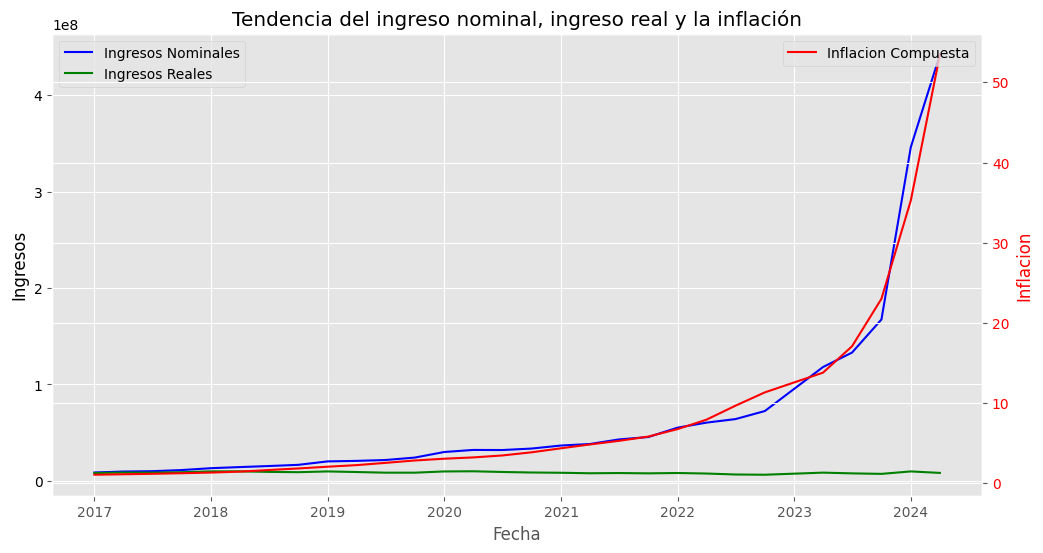

In [ ]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotear los ingresos nominales y ajustados en el eje y primario
ax1.plot(df_9['Fecha'], df_9['Ingresos (miles de pesos)'], color='blue', label='Ingresos Nominales')
ax1.plot(df_9['Fecha'], df_9['Ingresos_Reales (miles de pesos)'], color='green', label='Ingresos Reales')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Ingresos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Crear un segundo eje y para la inflación
ax2 = ax1.twinx()
ax2.plot(df_9['Fecha'], df_9['Inflacion_Compuesta'], color='red', label='Inflacion Compuesta')
ax2.set_ylabel('Inflacion', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Títulos y leyendas
plt.title('Tendencia del ingreso nominal, ingreso real y la inflación')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar la gráfica
plt.show()

**Observaciones**: *se visualiza como la inflación compone con el tiempo y los ingresos por ventas se van ajustando con la inflación. El ingreso real sigue siendo el mismo durante este período sin generar riqueza debido a los estragos de la inflación. Los ingresos por venta están en modo supervivencia. A continuación, se mostrará un gráfico logarítmico para una mejor comparación.*

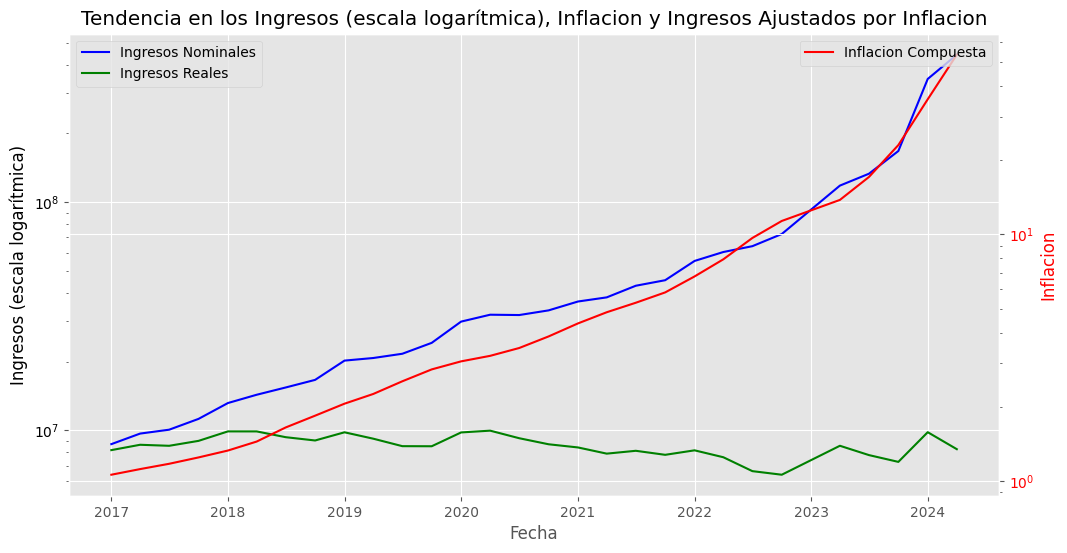

In [ ]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotear los ingresos nominales y ajustados en el eje y primario con escala logarítmica
ax1.plot(df_9['Fecha'], df_9['Ingresos (miles de pesos)'], color='blue', label='Ingresos Nominales')
ax1.plot(df_9['Fecha'], df_9['Ingresos_Reales (miles de pesos)'], color='green', label='Ingresos Reales')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Ingresos (escala logarítmica)', color='black')
ax1.set_yscale('log')  # Establecer la escala logarítmica
ax1.tick_params(axis='y', labelcolor='black')

# Crear un segundo eje y para la inflación
ax2 = ax1.twinx()
ax2.plot(df_9['Fecha'], df_9['Inflacion_Compuesta'], color='red', label='Inflacion Compuesta')
ax2.set_ylabel('Inflacion', color='red')
ax2.set_yscale('log') # Establecer la escala logarítmica en el segundo eje y
ax2.tick_params(axis='y', labelcolor='red')

# Títulos y leyendas
plt.title('Tendencia en los Ingresos (escala logarítmica), Inflacion y Ingresos Ajustados por Inflacion')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar la gráfica
plt.show()

**Observaciones**: *en este gráfico logarítmico queda más claro el comparativo. El ingreso real se mantiene totalmente plano sin generar nada de riqueza durante los año del 2017 al 2024. Da la impresión que todos los esfuerzos se centraron en no perder contra la inflación. El aumento por la inflación es prácticamente igual al aumento por ingresos nominales.*

#### 1.6. Análisis de correlación entre variables

##### 1.6.1. A continuación, se comprobará la correlación entre el aumento de los ingresos y la inflación trimestral, además de revisar si existe algun outlier o valor atípico, ya que debería ser muy similar a una regresión lineal por lo destacado anteriormente.

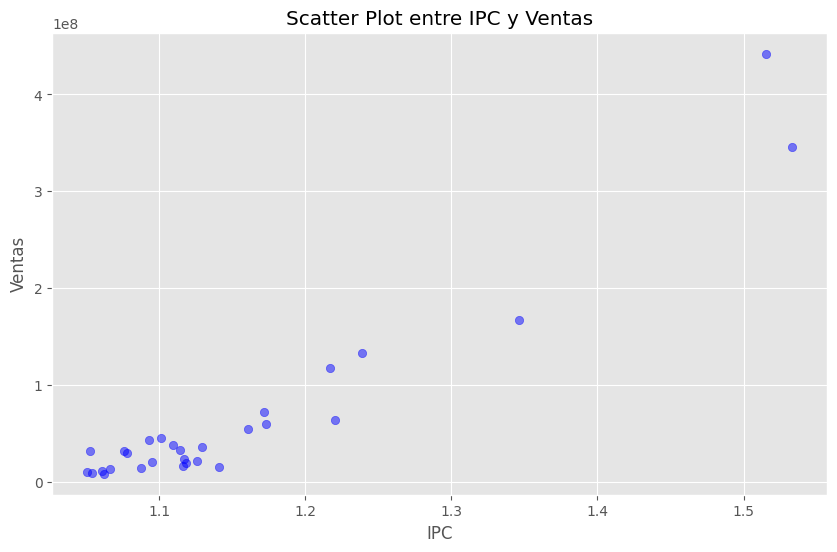

In [ ]:
x = df_9['Inflacion_Trimestral']  
y = df_9['Ingresos (miles de pesos)']  

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.title('Scatter Plot entre IPC y Ventas')
plt.xlabel('IPC')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

**Observaciones**: *la distribución es muy similar a una regresión lineal donde los ingresos por venta van aumentando a medida que aumenta la inflación. No se observan valores atípicos.*

#### 1.7. Análisis de duplicados

Este análisis no tiene sentido hacerlo porque no se trabajó con las ciudades. Solo se trabajó con 24 provincias y 5 tecnologías (que están en las columnas, por lo que es imposible que existan duplicados). No obstante, se aclara que se hizo una revisión en el archivo 'Internet.xlsx' para verificar que los nombres de las provincias estuvieran bien escritos y fueran homogéneos. Se encontró que están bien escritos y son coincidentes entre sí, es decir, no existen nombres de provincia mal escritos.

#### 1.8. Formateo final antes de exportar los DataFrames

* Se resuelve homogeneizar los decimales:
    * Tres decimales para los ingresos (están en miles de pesos).
    * Tres decimales para la inflación (por ejemplo, 2.7 % de inflación, que es lo estándar).
    * Dos decimales para la velocidad (podría no tener hoy día pero por que hay valores pequeños se resuelve así).

In [ ]:
df_9['Ingresos (miles de pesos)'] = df_9['Ingresos (miles de pesos)'].round(3)
df_9['Ingresos_Reales (miles de pesos)'] = df_9['Ingresos_Reales (miles de pesos)'].round(3)
df_9['Inflacion_Trimestral'] = df_9['Inflacion_Trimestral'].round(3)
df_9['Inflacion_Compuesta'] = df_9['Inflacion_Compuesta'].round(3)
df_3['Mbps (Media de bajada)'] = df_3['Mbps (Media de bajada)'].round(2)
df_4['Mbps (Media de bajada)'] = df_4['Mbps (Media de bajada)'].round(2)

In [ ]:
df_9['Ingresos (miles de pesos)'] = df_9['Ingresos (miles de pesos)'].apply(lambda x: f"{x:.3f}")
df_9['Ingresos_Reales (miles de pesos)'] = df_9['Ingresos_Reales (miles de pesos)'].apply(lambda x: f"{x:.3f}")
df_9['Inflacion_Trimestral'] = df_9['Inflacion_Trimestral'].apply(lambda x: f"{x:.3f}")
df_9['Inflacion_Compuesta'] = df_9['Inflacion_Compuesta'].apply(lambda x: f"{x:.3f}")
df_3['Mbps (Media de bajada)'] = df_3['Mbps (Media de bajada)'].apply(lambda x: f"{x:.2f}")
df_4['Mbps (Media de bajada)'] = df_4['Mbps (Media de bajada)'].apply(lambda x: f"{x:.2f}")

In [438]:
df_1_top = df_1[(df_1['Año'] == 2024) & (df_1['Trimestre'] == 2)].sort_values(by='Accesos por cada 100 hogares', ascending=False).head(5)

df_1_top[['Provincia', 'Accesos por cada 100 hogares', 'Fecha']]

Provincia  Accesos por cada 100 hogares      Fecha
1    Capital Federal                        116.37 2024-04-01
22  Tierra Del Fuego                        108.89 2024-04-01
18          San Luis                        103.40 2024-04-01
10          La Pampa                        101.17 2024-04-01
5            Córdoba                         90.79 2024-04-01

In [441]:
df_3

Año  Trimestre            Provincia  Mbps (Media de bajada)      Fecha
0     2024          2         Buenos Aires              157.410000 2024-04-01
1     2024          2      Capital Federal              233.010000 2024-04-01
2     2024          2            Catamarca               97.380000 2024-04-01
3     2024          2                Chaco              107.760000 2024-04-01
4     2024          2               Chubut               21.670000 2024-04-01
...    ...        ...                  ...                     ...        ...
1003  2014          1           Santa Cruz                3.315991 2014-01-01
1004  2014          1             Santa Fe                3.147407 2014-01-01
1005  2014          1  Santiago Del Estero                2.949472 2014-01-01
1006  2014          1     Tierra Del Fuego                3.446888 2014-01-01
1007  2014          1              Tucumán                3.208342 2014-01-01

[1008 rows x 5 columns]

In [443]:
df_3_top = df_3[(df_3['Año'] == 2024) & (df_3['Trimestre'] == 2)].sort_values(by='Mbps (Media de bajada)', ascending=False).head(5)

df_3_top[['Provincia', 'Mbps (Media de bajada)', 'Fecha']]

Provincia  Mbps (Media de bajada)      Fecha
1   Capital Federal                  233.01 2024-04-01
18         San Luis                  181.61 2024-04-01
0      Buenos Aires                  157.41 2024-04-01
5           Córdoba                  117.39 2024-04-01
23          Tucumán                  108.93 2024-04-01

#### 1.8. Exportación de los DataFrames

A continuación, se exportan todos los DataFrames transformados y analizados a un archivo Excel, para ser trabajados en Power BI. DataFrames a ser exportados.

1. Penetracion-hogares
2. Penetracion-totales
3. Velocidad % por prov
4. Totales VMD
5. Accesos Por Tecnología
6. Totales Accesos Por Tecnologia
7. Dial-BAf
8. Totales Dial-BAf
9. Ingresos

In [444]:
df_1.to_csv('dataset/penetracion-hogares.csv', index=False)
df_1_top.to_csv('dataset/penetracion-top.csv', index=False)
df_2.to_csv('dataset/penetracion-totales.csv', index=False)
df_3.to_csv('dataset/velocidad.csv', index=False)
df_3_top.to_csv('dataset/velocidad-top.csv', index=False)
df_4.to_csv('dataset/velocidad-totales.csv', index=False)
df_5.to_csv('dataset/accesos_tecnologia.csv', index=False)
df_6.to_csv('dataset/accesos_tecnologia-totales.csv', index=False)
df_7.to_csv('dataset/dialbaf.csv', index=False)
df_8.to_csv('dataset/dialbaf-totales.csv', index=False)
df_9.to_csv('dataset/ingresos_internet.csv', index=False)
df_long_7.to_csv('dataset/dialbaf-tec.csv', index=False)
df_long_8.to_csv('dataset/dialbaf-total-tec.csv', index=False)

#### 1.8. Conclusiones:
* Existen provincias que han incrementado los accesos de forma exponencial desde el 2014 hasta la fecha. 
* Aún así, existen provincias que aún cuenta con pocos accesos a internet (es decir, están lejos de 1 acceso por hogar, algo que debiera ser normal).
* Algo muy similar ocurre con la velocidad, pero se debe considerar lo siguiente en la velocidad:
  * No existe techo para la velocidad. Hoy el máximo son 10 mil Mbps. Y aquí el máximo está en 240 Mbps. Es decir, se puede aumentar mucho. Este aumento dependerá del desarrollo tecnológico del pais y abrirá nuevas puertas en los sectores que más se demanda la velocidad, entre ellos, streaming y gaming.
  * Da la impresión de que la velocidad está más alineada con la población en las provincias respectivas, aunque, puede existir alguna excepción.
* La tecnología Dial-up es obsoleta y aún quedan resabios de ella. Se recomienda eliminarla por completo, cambiando toda la estructura a banda ancha fija.
* En cuanto a las tecnologías de banda ancha fija, se recomienda enfocarse en la tecnología de fibra óptica en las ciudades, y en regiones rurales en tecnología inalámbrica (wireless). Es decir, la recomendación es concentrarse en dos tecnologías para dos zonas muy distintas. En el futuro inmediato, se está incorporando el internet satelital para zonas rurales y habrá que analizar más en detalle cómo se combinará con la tecnología inalámbrica, y si es mejor cambiar el wireless a satelital directamente. O, si la tecnología satelital es mejor que la inalámbrica y no es viable su desarrollo, enfocarse únicamente en la instalación de fibra óptica.
* En cuanto a los ingresos, se observa que los mismos han ajustado por inflación y no se ha generado riqueza genuina o real. Esto es malo porque no han contribuido a lo que demanda un accionista de ellos, es decir, que aumente el valor de sus ingresos y en consuecuencia, el valor de la empresa. La consecuencia final de ello es que los inversores podrían optar por desinvertir en la empresa. De esto se desprenden cuatro obsevaciones más: 
  * Considerando que los accesos han aumentado, quiere decir que la cantidad de servicios registrados también aumentó. No obstante, si el ingreso real se mantuvo plano, da la impresión de que el precio real de los servicios brindados ha ido disminuyendo con el tiempo. 
  * El punto anterior es una señal de alerta. Se recomienda ampliar el foso defensivo y generar ventajas competitivas.
  * Por tal motivo, se recomienda cambiar la estrategia de negocio, mejorar la imagen de marca, y crear un ecosistema enfocado en actividades de streaming y gaming, que mantenga "atrapado" al cliente, ofrenciendo un servicio único y de calidad de tal forma que el cliente piense que lo que paga es poco frente al servicio brindado.
  * En pos de ello, es necesario ampliar los datos a los que se tiene acceso para recabar información única y personalizada al cliente. Entonces, el ecosistema especializado en streaming y gaming podría ser:
    * Centrándose donde está la mayoría de la población, ofrecer al cliente velocidades ultrarrápidas con baja latencia incorporando la fibra óptica como linea principal del tecnología (y descartando las restantes).
    * En línea con ello, ofrecer 5G, es decir, conectividad móvil proporcionando así velocidades ultra rápidas y baja latencia.
    * Ofrecer una red de servidores de streaming. Ofrecer una estructura robusta para manejar grandes volúmenes de datos y garantizar una transmisión continua sin interrupciones bajo cualquier circunstancia.
    * Combinar tecnologías para optimizar el servicio de streaming para reducir la latencia y mejorar la velocidad.
    * Combinar tecnologías para optimizar el servicio de gaming para que experimenten una experiencia de juego fluida y sin retrasos.
    * Ofrecer servicios de almacenamiento en la nube. A la vez, podría proporcionar servicios adicionales de ciberseguridad, copias de seguridad automáticas, y recuperación de datos. 
    * Y en etapas posteriores se podría evaluar agregar al ecosistema:
      * Creacion de plataforma de streaming como Netflix.
      * Creación de juegos.
      * Venta de paquetes completos de hardware para montar streaming o gaming, con el objetivo de que un gamer contratando la empresa se olvide de todo.

* Analizar utilizando herramientas y técnicas estadísticas. Parece que aqui estoy bien.
* Identificar tendencias y patrones. Falta desarrollarlo mejor.
* Identificar nuevas oportunidades para la mejora de procesos. Falta desarrollarlo para que quede más claro.
* El punto es encontrar que está pasando y por qué.
* Conclusiones de por qué pasó lo que pasó.
* ¿Qué pasará?
* ¿Qué debería hacer?